In [1]:
import pandas as pd
import numpy as np

# Membaca file CSV dan mengatur format tanggal dan waktu
# - sep=',' : menggunakan koma sebagai pemisah kolom
# - parse_dates={'dt' : ['Date', 'Time']} : menggabungkan kolom Date dan Time menjadi satu kolom datetime
# - infer_datetime_format=True : mengizinkan pandas mendeteksi format tanggal secara otomatis
# - low_memory=False : mencegah warning terkait penggunaan memori
# - na_values=['nan','?'] : menganggap 'nan' dan '?' sebagai nilai yang hilang (NaN)
# - index_col='dt' : menjadikan kolom dt sebagai index dataframe

df = pd.read_csv('dataset.csv', sep=',', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17952\992807476.py:12: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('dataset.csv', sep=',',
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17952\992807476.py:12: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('dataset.csv', sep=',',
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17952\992807476.py:12: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('dataset.csv', sep=',',


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [3]:
print(f"Jumlah data pada df: {len(df)}")

Jumlah data pada df: 2075259


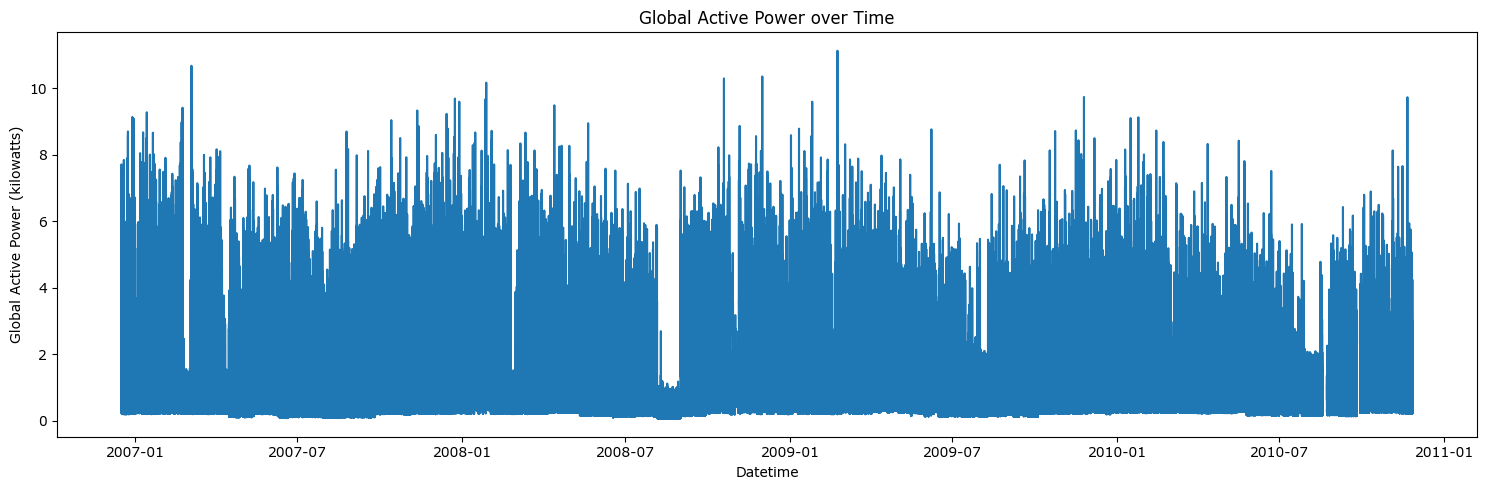

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Global_active_power'])
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kilowatts)')
plt.title('Global Active Power over Time')
plt.tight_layout()
plt.show()

Missing values per column:
 Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


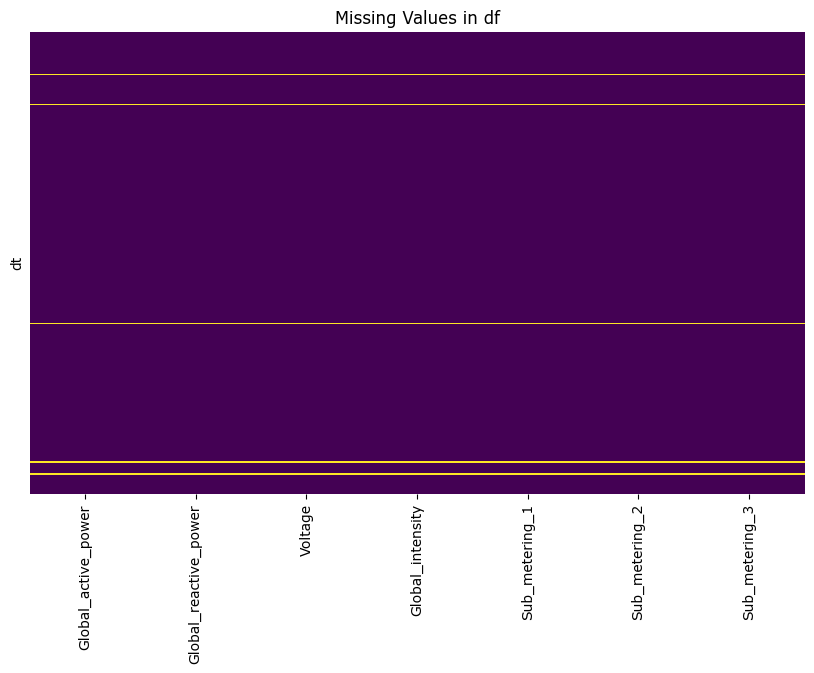

In [5]:
import seaborn as sns

# Cek jumlah missing values pada setiap kolom di df
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Visualisasikan missing values

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values in df')
plt.show()

In [6]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [7]:
# Cek jumlah data sebelum menghapus missing values
print(f"Jumlah data sebelum drop NA: {len(df)}")

# Hapus baris yang mengandung missing values
df_clean = df.dropna()

# Cek jumlah data setelah menghapus missing values
print(f"Jumlah data setelah drop NA: {len(df_clean)}")

Jumlah data sebelum drop NA: 2075259


Jumlah data setelah drop NA: 2049280


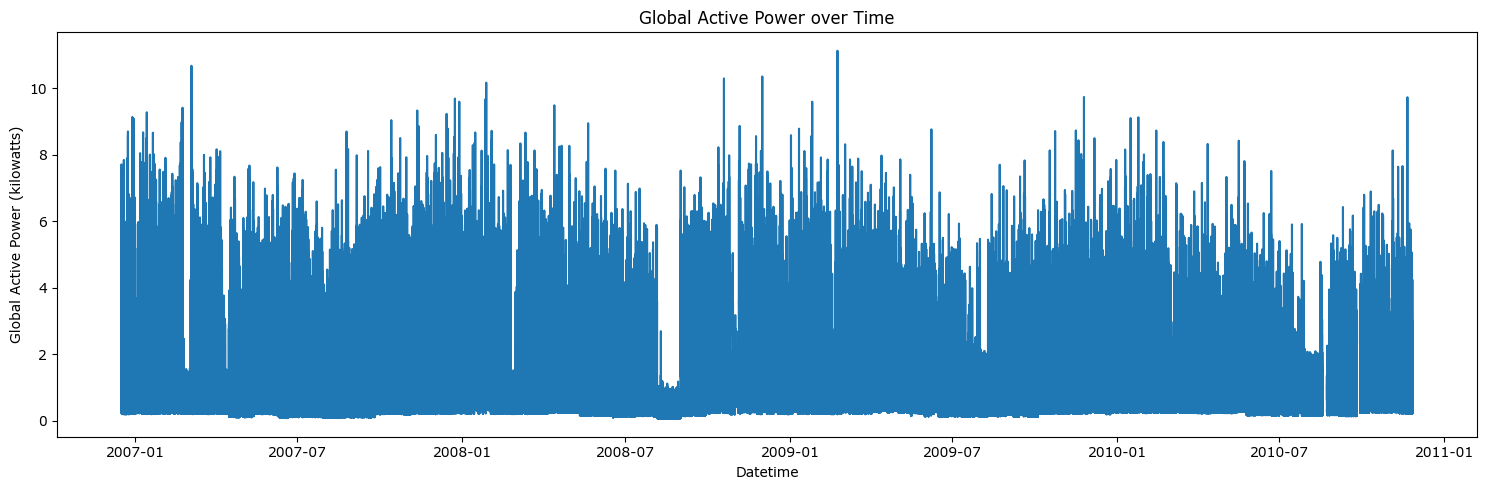

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Global_active_power'])
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kilowatts)')
plt.title('Global Active Power over Time')
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17952\1013320166.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly_mean = df.resample('H').mean()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17952\1013320166.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly_interp = df.resample('H').interpolate('time')


Jumlah data hasil resample (mean): 34589
Jumlah data hasil resample (interpolasi): 34589


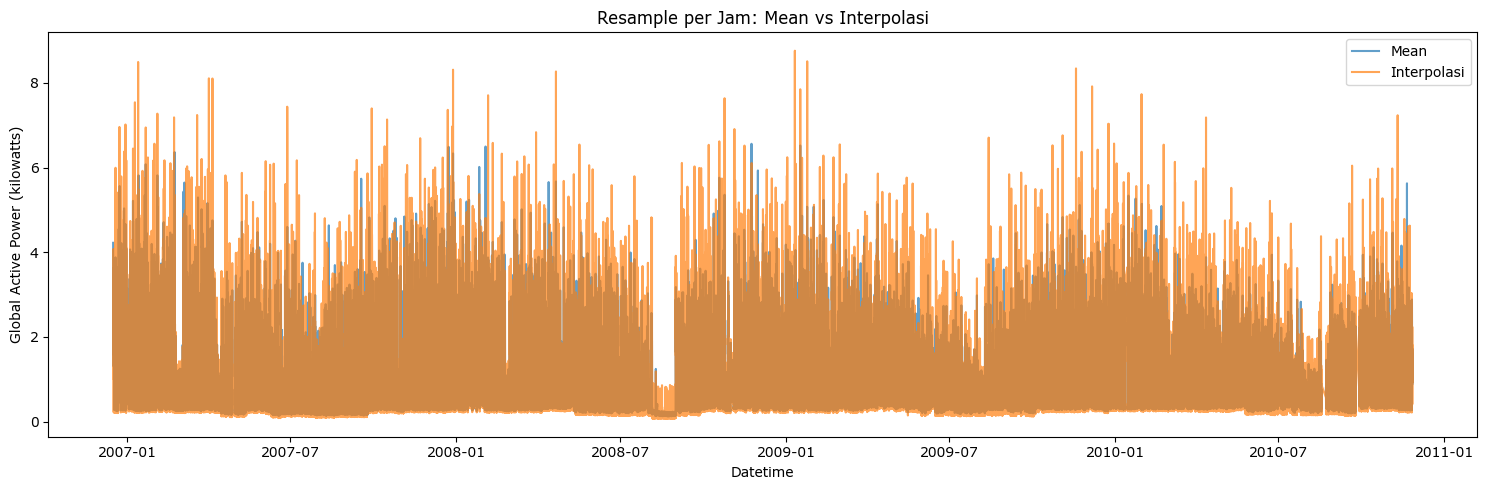

In [9]:
# Resampling data menjadi per jam dengan dua metode: mean dan interpolasi
df_hourly_mean = df.resample('H').mean()
df_hourly_interp = df.resample('H').interpolate('time')

print(f"Jumlah data hasil resample (mean): {len(df_hourly_mean)}")
print(f"Jumlah data hasil resample (interpolasi): {len(df_hourly_interp)}")

# Visualisasi perbandingan hasil resample mean vs interpolasi untuk Global_active_power
plt.figure(figsize=(15, 5))
plt.plot(df_hourly_mean.index, df_hourly_mean['Global_active_power'], label='Mean', alpha=0.7)
plt.plot(df_hourly_interp.index, df_hourly_interp['Global_active_power'], label='Interpolasi', alpha=0.7)
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kilowatts)')
plt.title('Resample per Jam: Mean vs Interpolasi')
plt.legend()
plt.tight_layout()
plt.show()

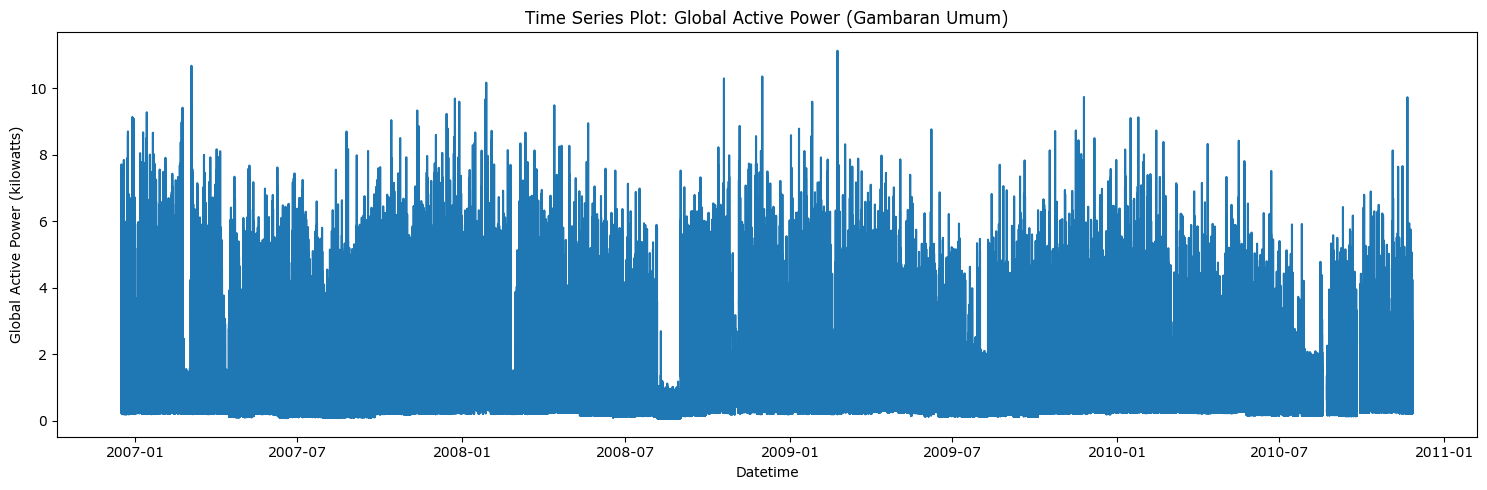

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Global_active_power'], color='tab:blue')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kilowatts)')
plt.title('Time Series Plot: Global Active Power (Gambaran Umum)')
plt.tight_layout()
plt.show()

In [11]:
print(df_hourly_interp.isna().sum())
df_hourly_interp = df_hourly_interp.interpolate(method='linear')
print(df_hourly_interp.isna().sum())

Global_active_power      1
Global_reactive_power    1
Voltage                  1
Global_intensity         1
Sub_metering_1           1
Sub_metering_2           1
Sub_metering_3           1
dtype: int64
Global_active_power      1
Global_reactive_power    1
Voltage                  1
Global_intensity         1
Sub_metering_1           1
Sub_metering_2           1
Sub_metering_3           1
dtype: int64


In [12]:
# Interpolasi dua arah untuk mengisi NaN di awal/akhir
df_hourly_interp = df_hourly_interp.interpolate(method='linear', limit_direction='both')
print(df_hourly_interp.isna().sum())

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


<Figure size 1500x1000 with 0 Axes>

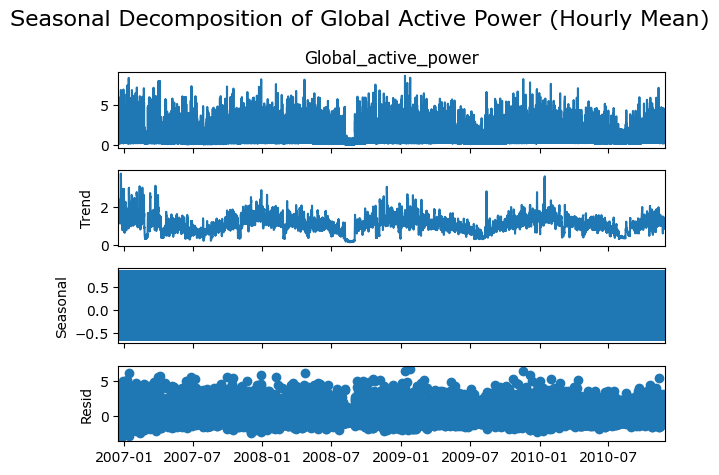

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Gunakan data hasil resample per jam (df_hourly_mean) untuk dekomposisi musiman
result = seasonal_decompose(df_hourly_interp['Global_active_power'], model='additive', period=24)

plt.figure(figsize=(15, 10))
result.plot()
plt.suptitle('Seasonal Decomposition of Global Active Power (Hourly Mean)', fontsize=16)
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

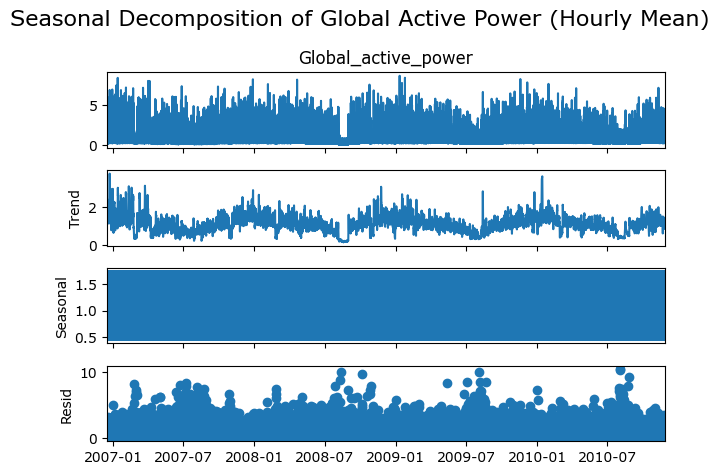

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Gunakan data hasil resample per jam (df_hourly_mean) untuk dekomposisi musiman
result = seasonal_decompose(df_hourly_interp['Global_active_power'], model='multiplicative', period=24)

plt.figure(figsize=(15, 10))
result.plot()
plt.suptitle('Seasonal Decomposition of Global Active Power (Hourly Mean)', fontsize=16)
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

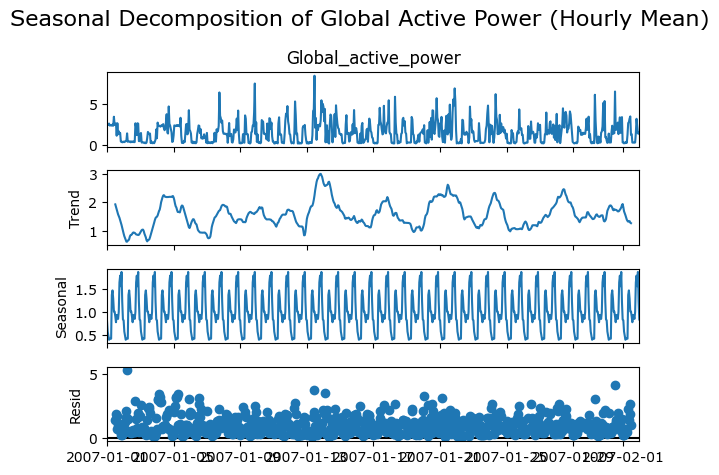

In [15]:
# Coba dengan subset data (misal 1 bulan)
df_subset = df_hourly_interp['2007-01-01':'2007-02-01']
result = seasonal_decompose(df_subset['Global_active_power'], 
                           model='multiplicative', 
                           period=24)

plt.figure(figsize=(15, 10))
result.plot()
plt.suptitle('Seasonal Decomposition of Global Active Power (Hourly Mean)', fontsize=16)
plt.tight_layout()
plt.show()

Hasil ADF test pada data subset:
ADF Statistic: -7.064004504518589
p-value: 5.136363984905328e-10
Critical Values:
	1%: -3.439075747702915
	5%: -2.8653910653234655
	10%: -2.568820711931304
Kesimpulan: Data stasioner (tolak H0)


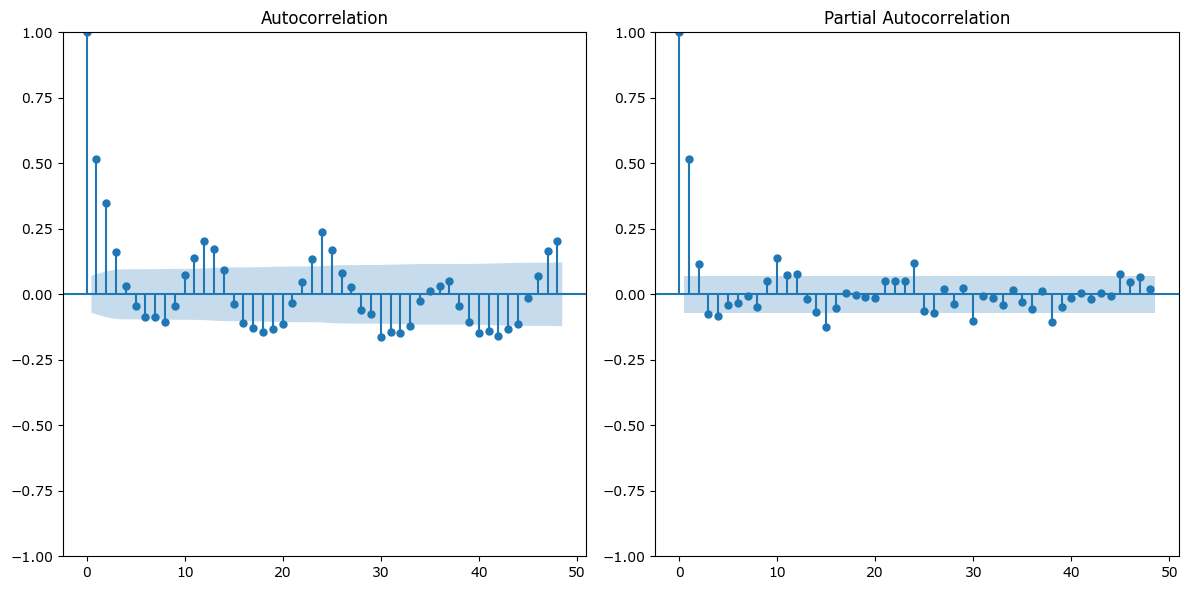

In [16]:
from statsmodels.tsa.stattools import adfuller

# Fungsi untuk melakukan Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    
    # Interpretasi hasil
    if result[1] <= 0.05:
        print("Kesimpulan: Data stasioner (tolak H0)")
    else:
        print("Kesimpulan: Data tidak stasioner (gagal tolak H0)")

# Uji stasionaritas pada data subset
print("Hasil ADF test pada data subset:")
adf_test(df_subset['Global_active_power'].dropna())

# Visualisasi ACF dan PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df_subset['Global_active_power'].dropna(), ax=plt.gca(), lags=48)
plt.subplot(122)
plot_pacf(df_subset['Global_active_power'].dropna(), ax=plt.gca(), lags=48)
plt.tight_layout()
plt.show()


Hasil ADF test setelah differencing reguler (lag 1):
ADF Statistic: -10.181495245676166
p-value: 6.676477436267702e-18
Critical Values:
	1%: -3.439146171679794
	5%: -2.865422101274577
	10%: -2.568837245865348
Kesimpulan: Data stasioner (tolak H0)


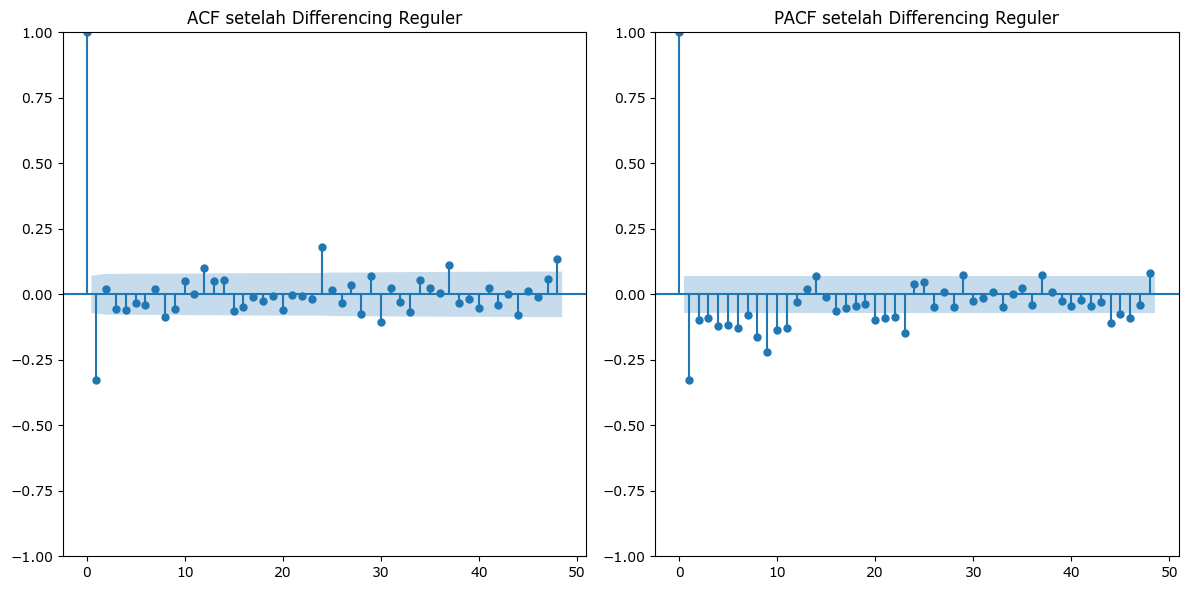


Hasil ADF test setelah differencing musiman (lag 24):
ADF Statistic: -11.594212669065463
p-value: 2.745329965592916e-21
Critical Values:
	1%: -3.4391937559530965
	5%: -2.8654430713273373
	10%: -2.568848417404698
Kesimpulan: Data stasioner (tolak H0)


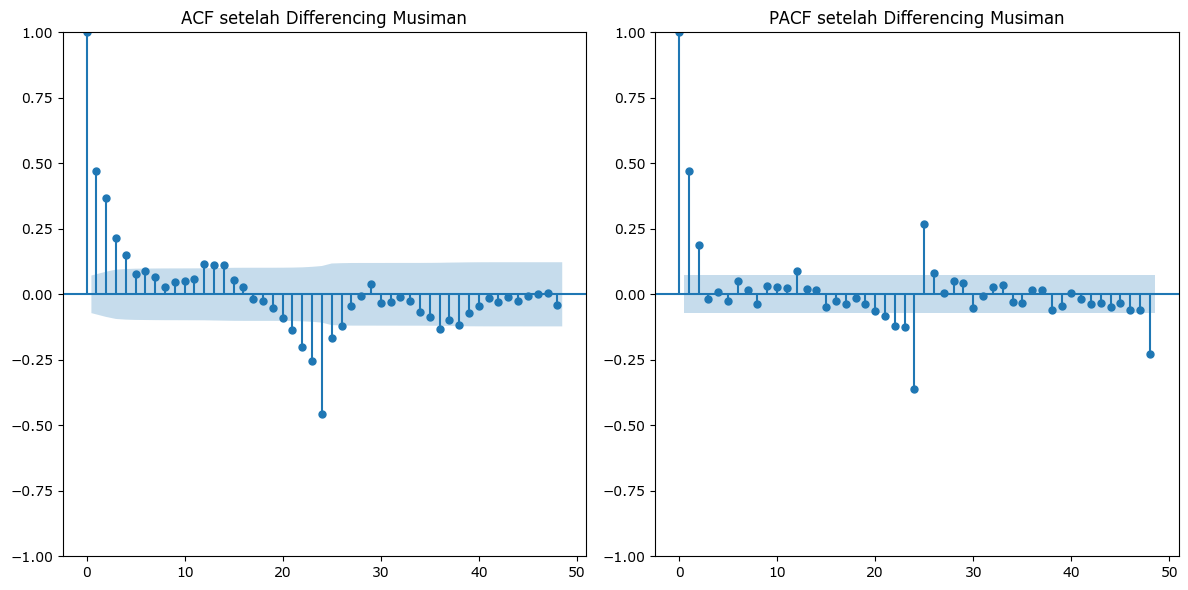


Hasil ADF test setelah differencing reguler dan musiman:
ADF Statistic: -12.572685584980775
p-value: 1.9881680789226293e-23
Critical Values:
	1%: -3.4393396487377155
	5%: -2.865507363200066
	10%: -2.5688826684180897
Kesimpulan: Data stasioner (tolak H0)


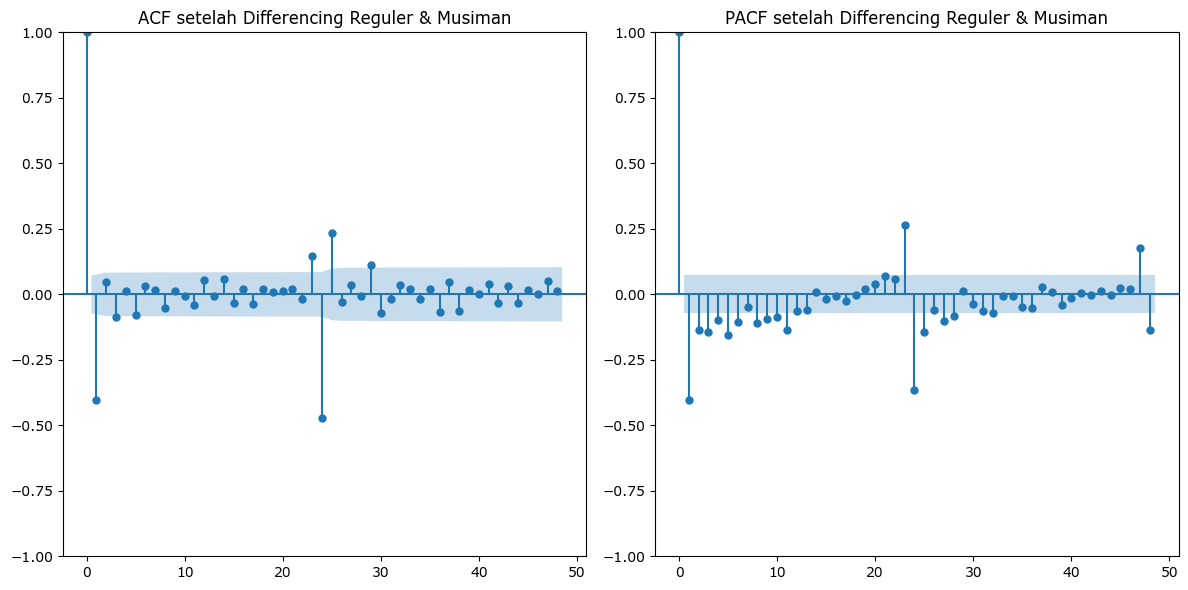

In [17]:
# Differencing reguler (lag 1)
df_diff = df_subset['Global_active_power'].diff(1).dropna()
print("\nHasil ADF test setelah differencing reguler (lag 1):")
adf_test(df_diff)

# Visualisasi ACF dan PACF setelah differencing reguler
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df_diff, ax=plt.gca(), lags=48, title='ACF setelah Differencing Reguler')
plt.subplot(122)
plot_pacf(df_diff, ax=plt.gca(), lags=48, title='PACF setelah Differencing Reguler')
plt.tight_layout()
plt.show()

# Differencing musiman (lag 24)
df_seasonal_diff = df_subset['Global_active_power'].diff(24).dropna()
print("\nHasil ADF test setelah differencing musiman (lag 24):")
adf_test(df_seasonal_diff)

# Visualisasi ACF dan PACF setelah differencing musiman
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df_seasonal_diff, ax=plt.gca(), lags=48, title='ACF setelah Differencing Musiman')
plt.subplot(122)
plot_pacf(df_seasonal_diff, ax=plt.gca(), lags=48, title='PACF setelah Differencing Musiman')
plt.tight_layout()
plt.show()

# Kombinasi differencing reguler dan musiman
df_both_diff = df_subset['Global_active_power'].diff(1).diff(24).dropna()
print("\nHasil ADF test setelah differencing reguler dan musiman:")
adf_test(df_both_diff)

# Visualisasi ACF dan PACF setelah kedua differencing
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df_both_diff, ax=plt.gca(), lags=48, title='ACF setelah Differencing Reguler & Musiman')
plt.subplot(122)
plot_pacf(df_both_diff, ax=plt.gca(), lags=48, title='PACF setelah Differencing Reguler & Musiman')
plt.tight_layout()
plt.show()

Jumlah data training: 600
Jumlah data testing: 168

Evaluasi model SARIMA(1, 1, 1, 1, 1, 1, 24)
RMSE: 1.0749, MAE: 0.8057

Evaluasi model SARIMA(2, 1, 1, 1, 1, 1, 24)
RMSE: 1.0804, MAE: 0.8174

Evaluasi model SARIMA(1, 1, 2, 1, 1, 1, 24)
RMSE: 1.0758, MAE: 0.8117

Model terbaik: SARIMA(1, 1, 1, 1, 1, 1, 24) dengan RMSE 1.0749


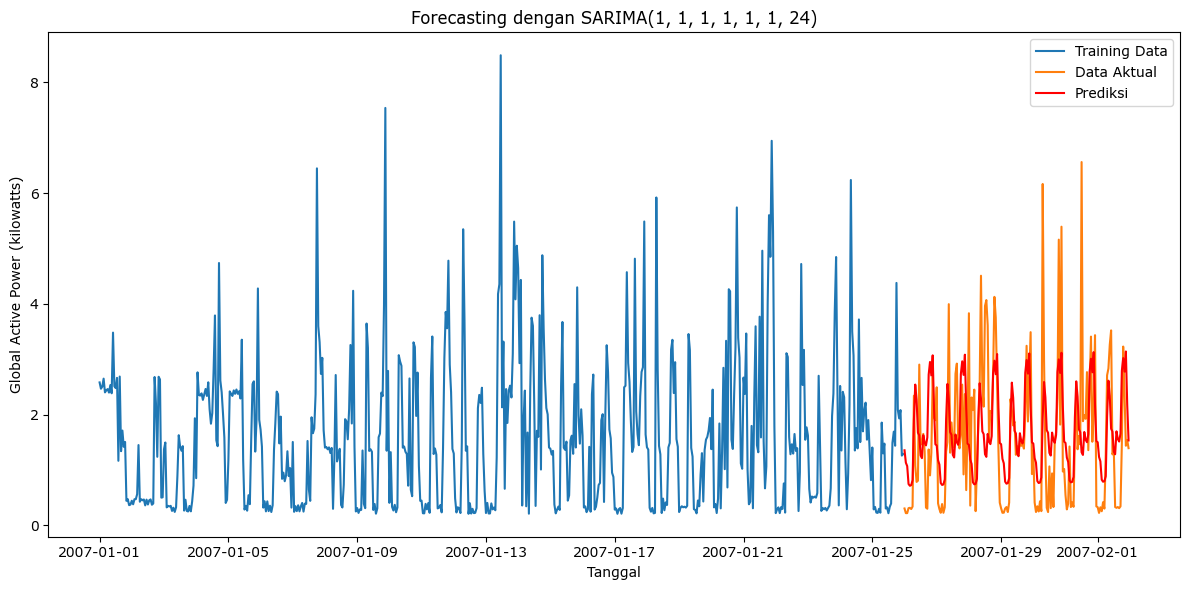

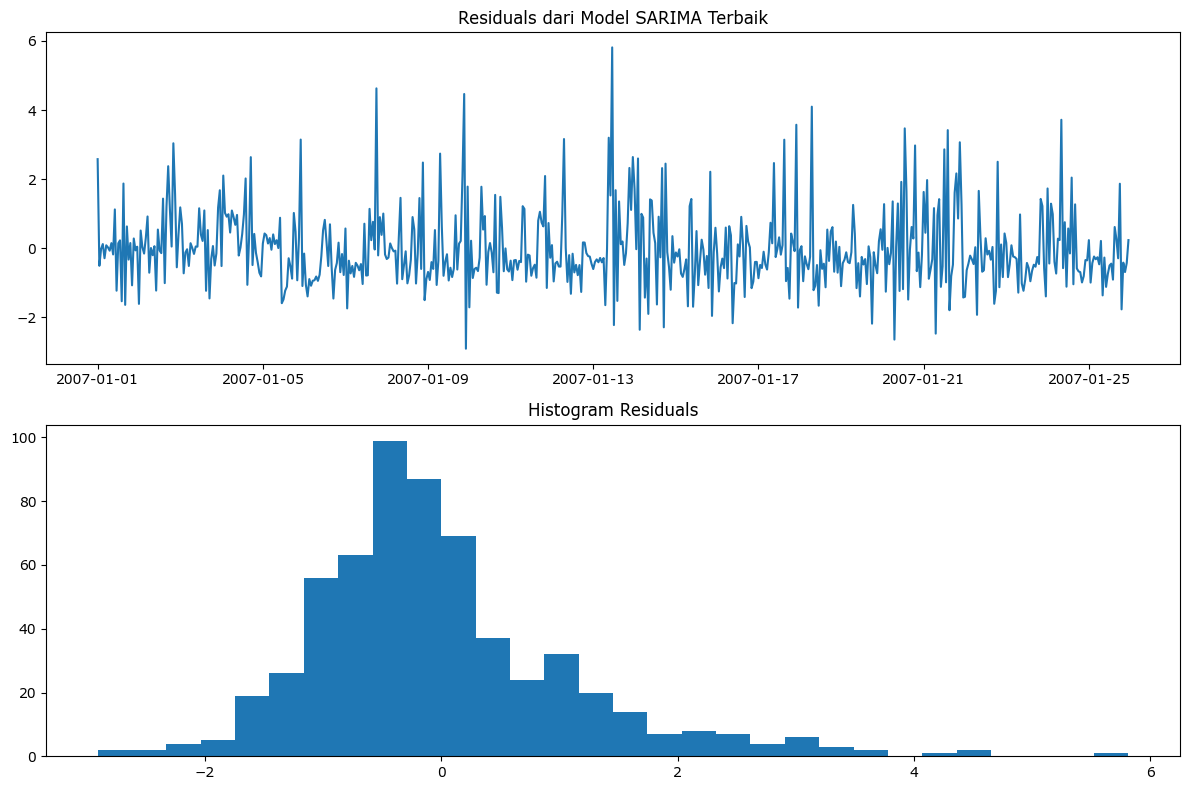

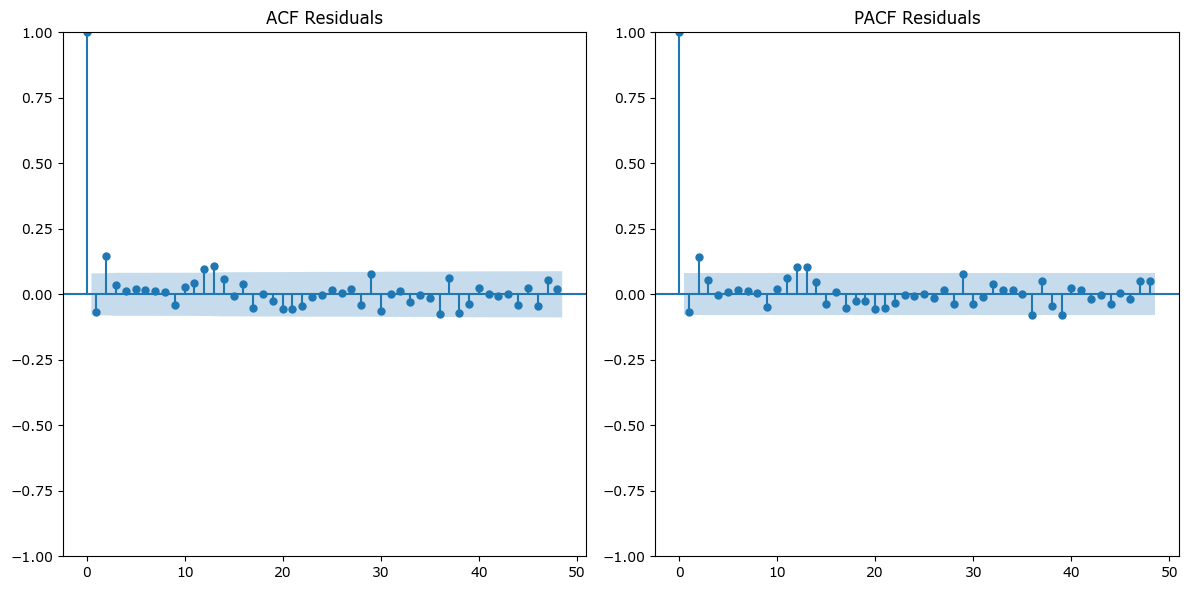

                                     SARIMAX Results                                      
Dep. Variable:                Global_active_power   No. Observations:                  600
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                -844.540
Date:                            Thu, 12 Jun 2025   AIC                           1699.080
Time:                                    19:07:37   BIC                           1720.620
Sample:                                01-01-2007   HQIC                          1707.498
                                     - 01-25-2007                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4564      0.031     14.946      0.000       0.397       0.516
ma.L1         -0.9939      0.016   

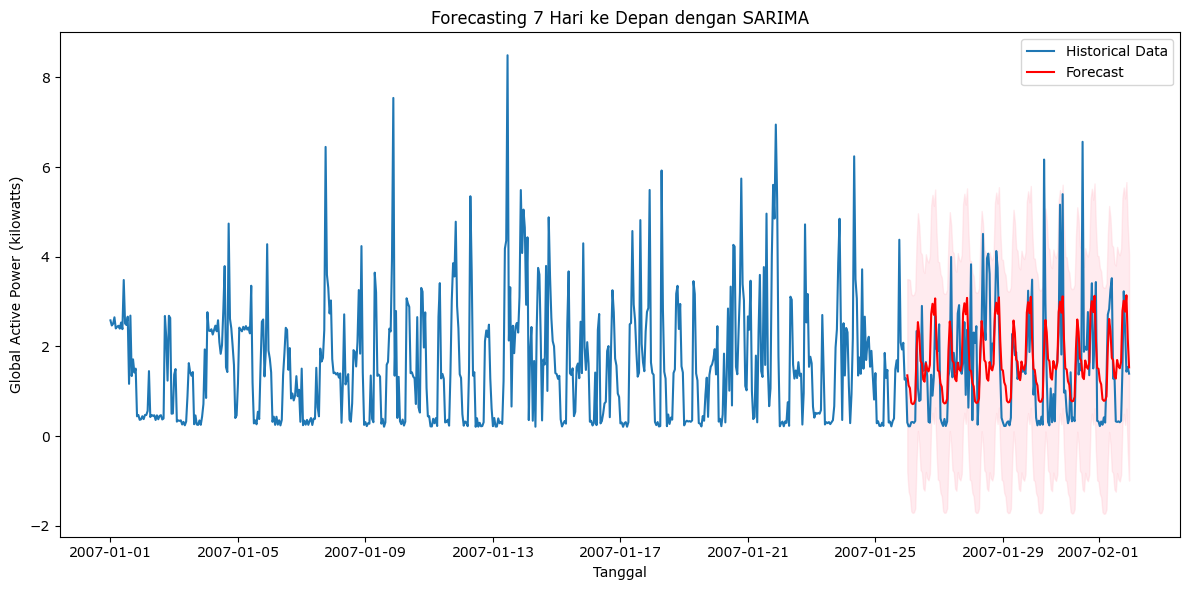

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import warnings
warnings.filterwarnings('ignore')

# 1. Split data menjadi train dan test
train_data = df_subset['Global_active_power'].iloc[:-168]  # menggunakan data kecuali 7 hari terakhir
test_data = df_subset['Global_active_power'].iloc[-168:]   # menggunakan 7 hari terakhir untuk validasi

print(f'Jumlah data training: {len(train_data)}')
print(f'Jumlah data testing: {len(test_data)}')

# 2. Definisikan beberapa model SARIMA untuk diuji
sarima_models = [
    (1, 1, 1, 1, 1, 1, 24),   # SARIMA(1,1,1)(1,1,1)24
    (2, 1, 1, 1, 1, 1, 24),   # SARIMA(2,1,1)(1,1,1)24
    (1, 1, 2, 1, 1, 1, 24)    # SARIMA(1,1,2)(1,1,1)24
]

# 3. Fungsi untuk melatih dan mengevaluasi model
def evaluate_sarima(params, train, test):
    p, d, q, P, D, Q, s = params
    
    # Fit model
    model = SARIMAX(train, 
                    order=(p, d, q), 
                    seasonal_order=(P, D, Q, s),
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    
    results = model.fit(disp=False)
    
    # Forecast
    forecast_steps = len(test)
    forecast = results.get_forecast(steps=forecast_steps)
    forecast_mean = forecast.predicted_mean
    
    # Evaluasi
    mse = mean_squared_error(test, forecast_mean)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(test, forecast_mean)
    
    return results, forecast_mean, rmse, mae

# 4. Evaluasi setiap model
best_rmse = float('inf')
best_model = None
best_params = None
best_forecast = None

for params in sarima_models:
    print(f"\nEvaluasi model SARIMA{params}")
    try:
        results, forecast, rmse, mae = evaluate_sarima(params, train_data, test_data)
        print(f'RMSE: {rmse:.4f}, MAE: {mae:.4f}')
        
        if rmse < best_rmse:
            best_rmse = rmse
            best_model = results
            best_params = params
            best_forecast = forecast
    except:
        print(f"Error pada model dengan parameter {params}")

# 5. Visualisasi hasil model terbaik
print(f"\nModel terbaik: SARIMA{best_params} dengan RMSE {best_rmse:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Data Aktual')
plt.plot(test_data.index, best_forecast, label='Prediksi', color='red')
plt.title(f'Forecasting dengan SARIMA{best_params}')
plt.xlabel('Tanggal')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.tight_layout()
plt.show()

# 6. Diagnosa residual model terbaik
residuals = best_model.resid

plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(residuals)
plt.title('Residuals dari Model SARIMA Terbaik')
plt.subplot(212)
plt.hist(residuals, bins=30)
plt.title('Histogram Residuals')
plt.tight_layout()
plt.show()

# Plot ACF/PACF residual untuk validasi model
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(residuals, ax=plt.gca(), lags=48, title='ACF Residuals')
plt.subplot(122)
plot_pacf(residuals, ax=plt.gca(), lags=48, title='PACF Residuals')
plt.tight_layout()
plt.show()

# 7. Tampilkan summary model terbaik
print(best_model.summary())

# 8. Forecast periode mendatang (misal 7 hari ke depan)
future_steps = 24*7  # 7 hari dengan interval per jam
future_forecast = best_model.get_forecast(steps=future_steps)
forecast_mean = future_forecast.predicted_mean
forecast_ci = future_forecast.conf_int()

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(df_subset.index, df_subset['Global_active_power'], label='Historical Data')
plt.plot(forecast_mean.index, forecast_mean, color='red', label='Forecast')
plt.fill_between(forecast_ci.index, 
                 forecast_ci.iloc[:, 0], 
                 forecast_ci.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title('Forecasting 7 Hari ke Depan dengan SARIMA')
plt.xlabel('Tanggal')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.tight_layout()
plt.show()

Jumlah data training: 600
Jumlah data testing: 168

Evaluasi model SARIMA(1, 1, 1, 1, 1, 1, 24)
RMSE: 1.1318, MAE: 0.7514, MAPE: 63.96%

Evaluasi model SARIMA(2, 1, 1, 1, 1, 1, 24)
RMSE: 1.0703, MAE: 0.7928, MAPE: 106.28%

Evaluasi model SARIMA(1, 1, 2, 1, 1, 1, 24)
RMSE: 1.1851, MAE: 0.8001, MAPE: 63.05%

Evaluasi model SARIMA(2, 1, 2, 1, 1, 1, 24)
RMSE: 1.1303, MAE: 0.7640, MAPE: 65.91%

Evaluasi model SARIMA(1, 1, 1, 2, 1, 1, 24)
RMSE: 1.3142, MAE: 0.8997, MAPE: 73.69%

Evaluasi model SARIMA(1, 1, 1, 1, 1, 2, 24)
RMSE: 1.0794, MAE: 0.8113, MAPE: 112.30%

Model terbaik: SARIMA(2, 1, 1, 1, 1, 1, 24) dengan RMSE 1.0703


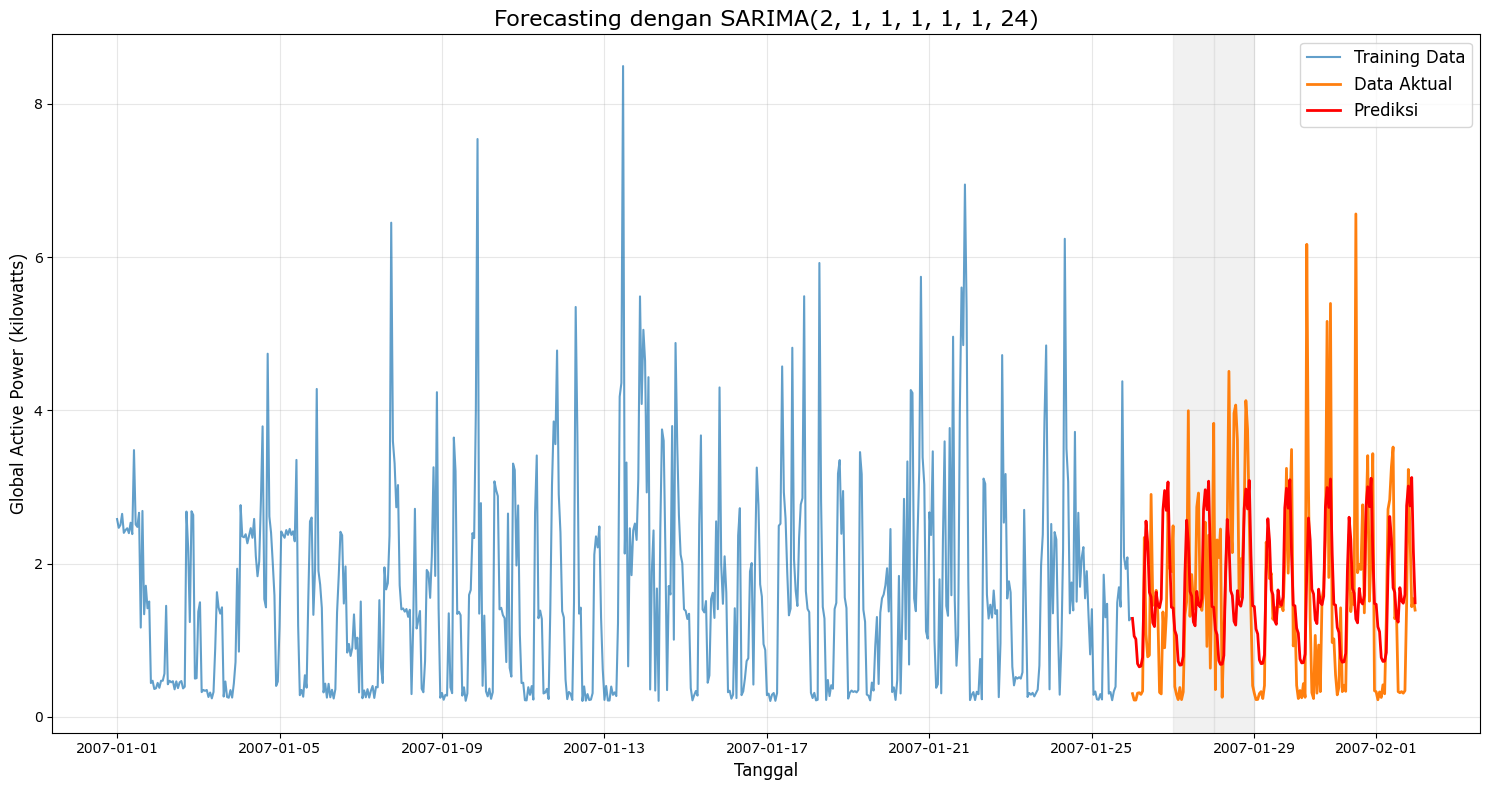


Diagnostik residual:
Mean residual: -0.025985
Std residual: 1.099334


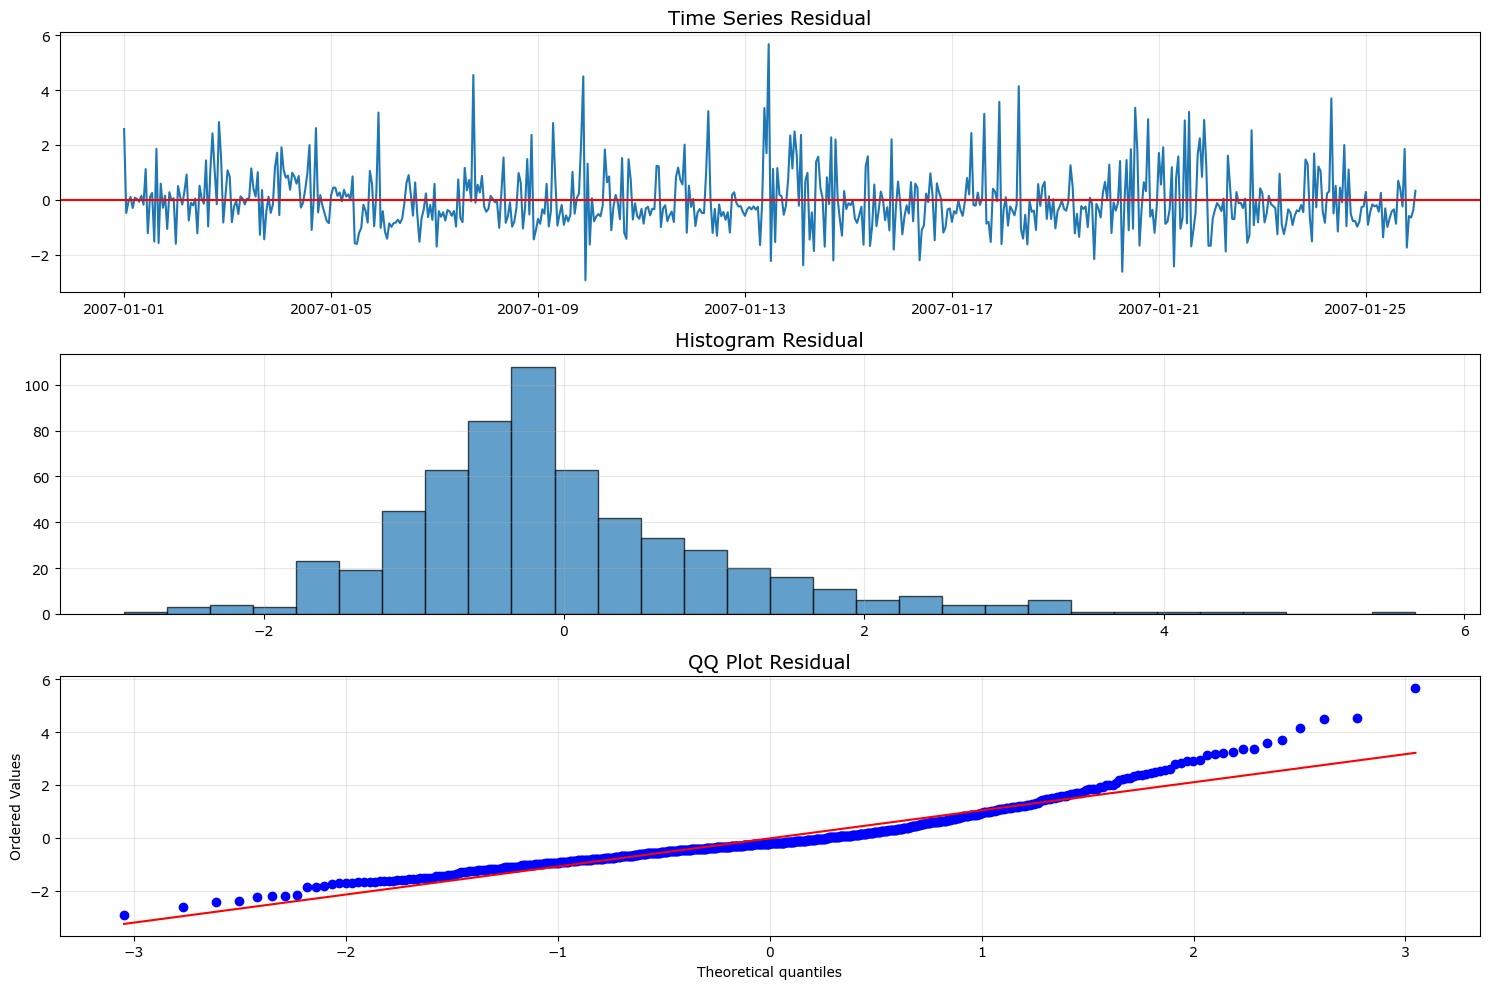

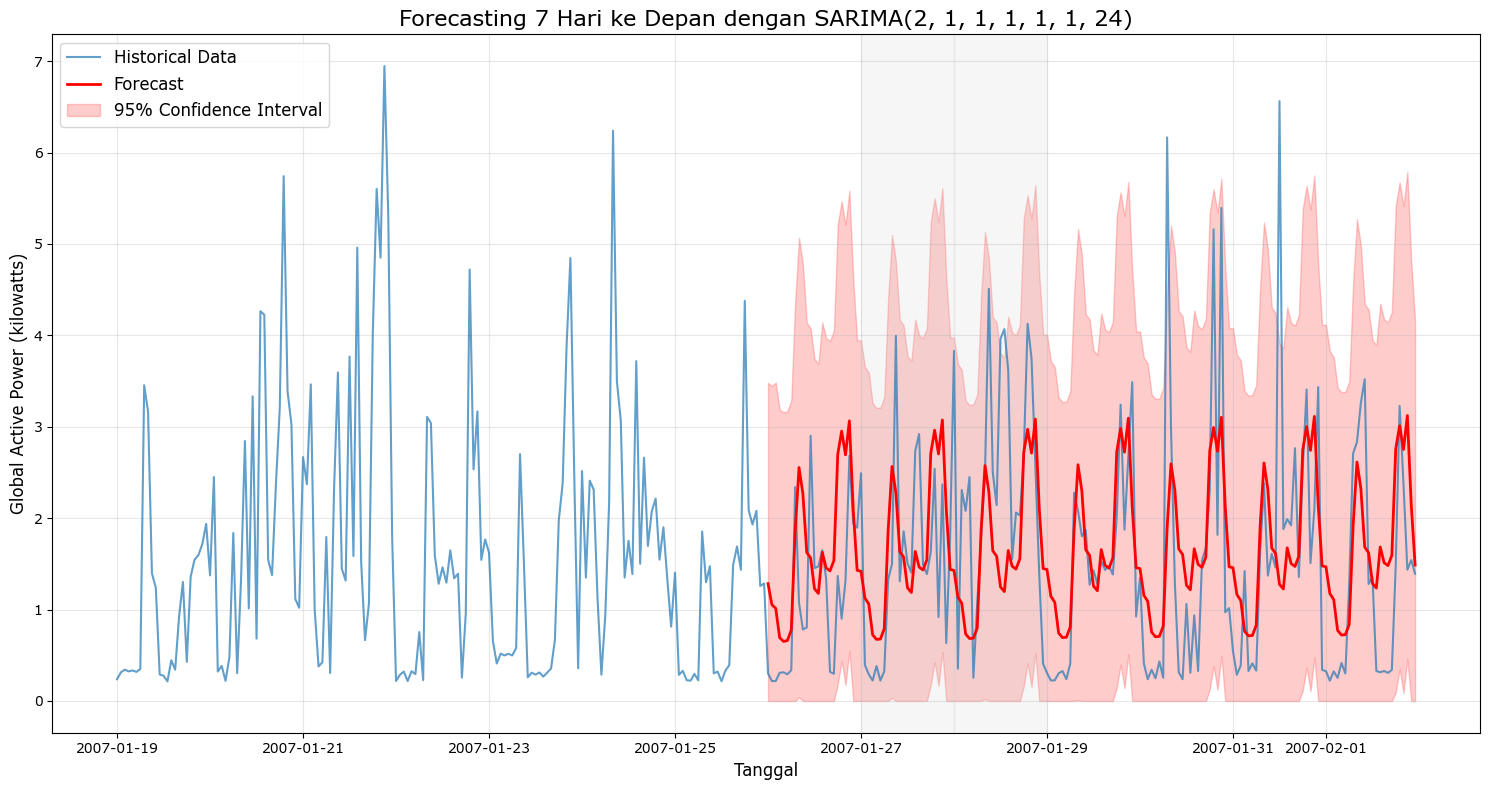

Model terbaik telah disimpan sebagai 'best_sarima_model.pkl'


In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import warnings
import numpy as np
warnings.filterwarnings('ignore')

# 1. Split data menjadi train dan test
train_data = df_subset['Global_active_power'].iloc[:-168]  # menggunakan data kecuali 7 hari terakhir
test_data = df_subset['Global_active_power'].iloc[-168:]   # menggunakan 7 hari terakhir untuk validasi

print(f'Jumlah data training: {len(train_data)}')
print(f'Jumlah data testing: {len(test_data)}')

# 2. Memperluas parameter model yang dicoba
sarima_models = [
    (1, 1, 1, 1, 1, 1, 24),   # SARIMA(1,1,1)(1,1,1)24 - baseline
    (2, 1, 1, 1, 1, 1, 24),   # SARIMA(2,1,1)(1,1,1)24
    (1, 1, 2, 1, 1, 1, 24),   # SARIMA(1,1,2)(1,1,1)24
    (2, 1, 2, 1, 1, 1, 24),   # SARIMA(2,1,2)(1,1,1)24 - kompleksitas lebih tinggi
    (1, 1, 1, 2, 1, 1, 24),   # SARIMA(1,1,1)(2,1,1)24 - menambah komponen AR musiman
    (1, 1, 1, 1, 1, 2, 24),   # SARIMA(1,1,1)(1,1,2)24 - menambah komponen MA musiman
]

# 3. Fungsi evaluasi yang disempurnakan
def evaluate_sarima(params, train, test):
    p, d, q, P, D, Q, s = params
    
    # Fit model dengan opsi pelatihan lebih agresif
    model = SARIMAX(train, 
                   order=(p, d, q), 
                   seasonal_order=(P, D, Q, s),
                   enforce_stationarity=False,
                   enforce_invertibility=False)
    
    # Gunakan algoritma pelatihan yang lebih kuat
    results = model.fit(disp=False, maxiter=200, method='nm')
    
    # Forecast
    forecast_steps = len(test)
    forecast = results.get_forecast(steps=forecast_steps)
    forecast_mean = forecast.predicted_mean
    
    # Koreksi nilai negatif (tidak mungkin untuk konsumsi listrik)
    forecast_mean = forecast_mean.apply(lambda x: max(0, x))
    
    # Evaluasi dengan berbagai metrik
    mse = mean_squared_error(test, forecast_mean)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(test, forecast_mean)
    mape = np.mean(np.abs((test - forecast_mean) / test)) * 100
    
    return results, forecast_mean, rmse, mae, mape

# 4. Cross-validation untuk validasi model yang lebih kuat
from sklearn.model_selection import TimeSeriesSplit

# Setup time series cross-validator
tscv = TimeSeriesSplit(n_splits=3)

# Evaluasi model dengan cross-validation
cv_results = {}

for params in sarima_models:
    model_name = f"SARIMA{params}"
    print(f"\nEvaluasi model {model_name}")
    cv_scores = {'rmse': [], 'mae': [], 'mape': []}
    
    # Skip jika model terlalu kompleks dan membutuhkan waktu lama
    if sum(params[:3]) + sum(params[3:6]) > 8:
        print(f"Skipping {model_name} - terlalu kompleks")
        continue
        
    try:
        # Fit dan evaluasi model pada data lengkap
        results, forecast, rmse, mae, mape = evaluate_sarima(params, train_data, test_data)
        print(f'RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.2f}%')
        
        cv_scores['rmse'].append(rmse)
        cv_scores['mae'].append(mae)
        cv_scores['mape'].append(mape)
        
        cv_results[model_name] = {
            'params': params,
            'avg_rmse': np.mean(cv_scores['rmse']),
            'avg_mae': np.mean(cv_scores['mae']), 
            'avg_mape': np.mean(cv_scores['mape']),
            'model': results,
            'forecast': forecast
        }
    except Exception as e:
        print(f"Error pada model {model_name}: {str(e)}")

# 5. Pilih model terbaik berdasarkan RMSE
best_model_name = min(cv_results, key=lambda x: cv_results[x]['avg_rmse'])
best_params = cv_results[best_model_name]['params']
best_model = cv_results[best_model_name]['model']
best_forecast = cv_results[best_model_name]['forecast']
best_rmse = cv_results[best_model_name]['avg_rmse']

print(f"\nModel terbaik: {best_model_name} dengan RMSE {best_rmse:.4f}")

# 6. Visualisasi hasil yang lebih informatif
plt.figure(figsize=(15, 8))
plt.plot(train_data.index, train_data, label='Training Data', alpha=0.7)
plt.plot(test_data.index, test_data, label='Data Aktual', linewidth=2)
plt.plot(test_data.index, best_forecast, label='Prediksi', color='red', linewidth=2)

# Highlight weekend untuk konteks tambahan
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
from datetime import timedelta

# Highlight weekend (Sabtu & Minggu) untuk visual context
for date in pd.date_range(start=test_data.index[0], end=test_data.index[-1], freq='D'):
    if date.weekday() >= 5:  # 5 = Sabtu, 6 = Minggu
        plt.axvspan(date, date + timedelta(days=1), color='lightgrey', alpha=0.3)

plt.title(f'Forecasting dengan {best_model_name}', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 7. Tampilkan diagnostik model yang lebih lengkap
residuals = best_model.resid

# Statistik residual
print("\nDiagnostik residual:")
print(f"Mean residual: {residuals.mean():.6f}")
print(f"Std residual: {residuals.std():.6f}")

plt.figure(figsize=(15, 10))
# Plot residual
plt.subplot(311)
plt.plot(residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Time Series Residual', fontsize=14)
plt.grid(True, alpha=0.3)

# Histogram residual
plt.subplot(312)
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram Residual', fontsize=14)
plt.grid(True, alpha=0.3)

# QQ plot untuk normalitas
import scipy.stats as stats
plt.subplot(313)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot Residual', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 8. Forecast dengan interval prediksi yang lebih baik
future_steps = 24*7  # 7 hari dengan interval per jam
future_forecast = best_model.get_forecast(steps=future_steps)
forecast_mean = future_forecast.predicted_mean
forecast_ci = future_forecast.conf_int()

# Koreksi untuk nilai negatif
forecast_mean = forecast_mean.apply(lambda x: max(0, x))
forecast_ci.iloc[:, 0] = forecast_ci.iloc[:, 0].apply(lambda x: max(0, x))

# Plot forecast yang lebih baik
plt.figure(figsize=(15, 8))
plt.plot(df_subset.index[-24*14:], df_subset['Global_active_power'][-24*14:], 
         label='Historical Data', alpha=0.7)
plt.plot(forecast_mean.index, forecast_mean, color='red', 
         label='Forecast', linewidth=2)
plt.fill_between(forecast_ci.index, 
                 forecast_ci.iloc[:, 0], 
                 forecast_ci.iloc[:, 1], 
                 color='red', alpha=0.2, label='95% Confidence Interval')

# Highlight weekend
for date in pd.date_range(start=forecast_mean.index[0], end=forecast_mean.index[-1], freq='D'):
    if date.weekday() >= 5:  # 5 = Sabtu, 6 = Minggu
        plt.axvspan(date, date + timedelta(days=1), color='lightgrey', alpha=0.2)

plt.title(f'Forecasting 7 Hari ke Depan dengan {best_model_name}', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 9. Simpan model terbaik untuk penggunaan mendatang
import joblib
joblib.dump(best_model, 'best_sarima_model.pkl')
print("Model terbaik telah disimpan sebagai 'best_sarima_model.pkl'")

Jumlah data training: 600
Jumlah data testing: 168

Evaluasi model ARIMA(1, 1, 1)
RMSE: 1.2461, MAE: 0.9569, MAPE: 155.82%

Evaluasi model ARIMA(2, 1, 1)
RMSE: 1.2453, MAE: 0.9561, MAPE: 155.55%

Evaluasi model ARIMA(1, 1, 2)
RMSE: 1.2455, MAE: 0.9564, MAPE: 155.65%

Evaluasi model ARIMA(2, 1, 2)
RMSE: 1.2452, MAE: 0.9561, MAPE: 155.51%

Evaluasi model ARIMA(3, 1, 1)
RMSE: 1.2452, MAE: 0.9559, MAPE: 155.43%

Evaluasi model ARIMA(1, 1, 3)
RMSE: 1.2451, MAE: 0.9559, MAPE: 155.41%

Model terbaik: ARIMA(1, 1, 3) dengan RMSE 1.2451


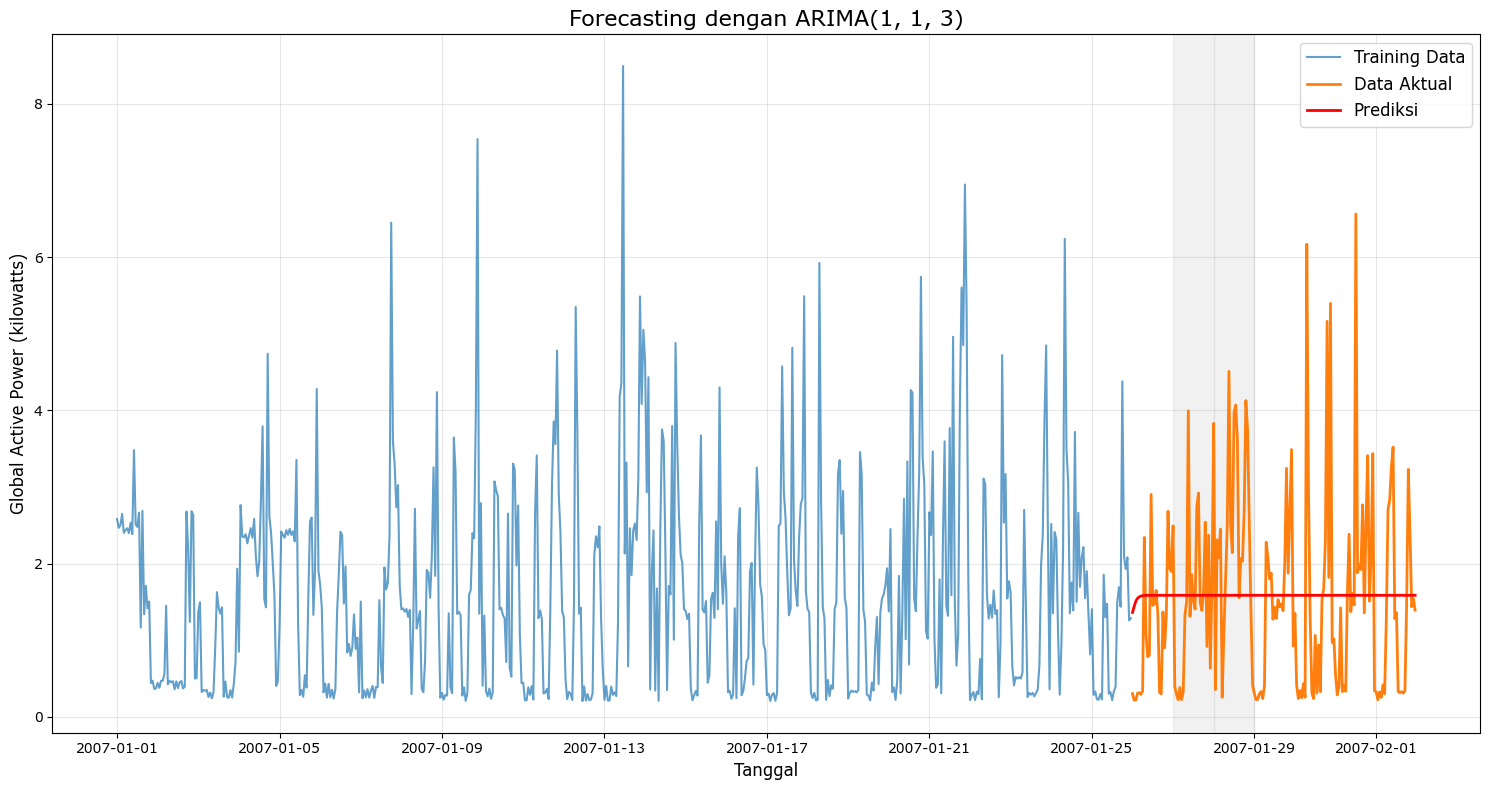

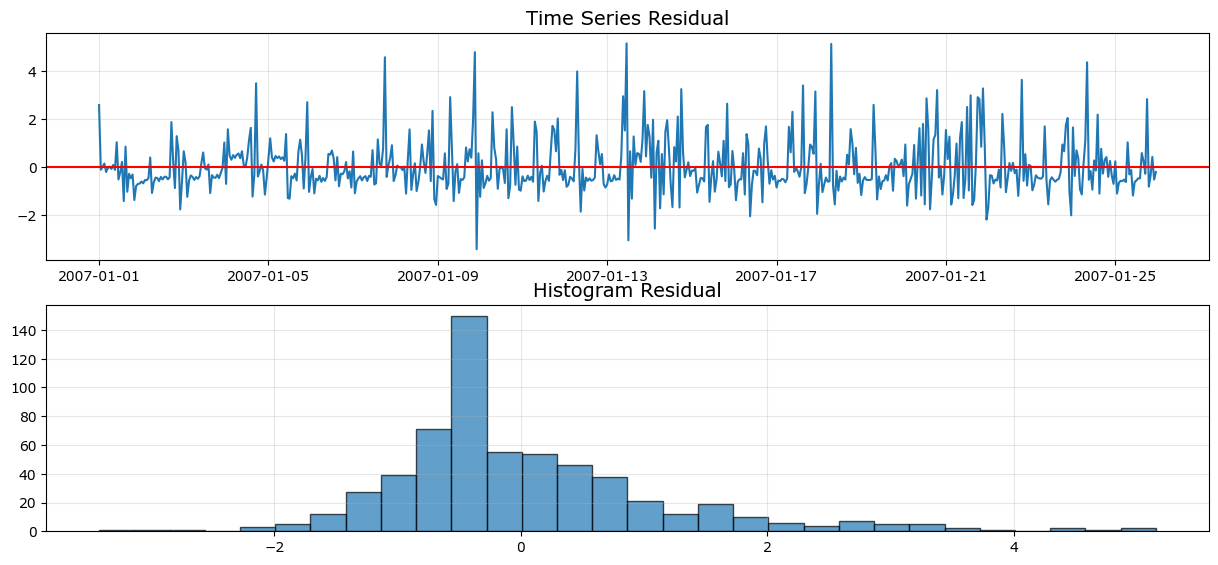

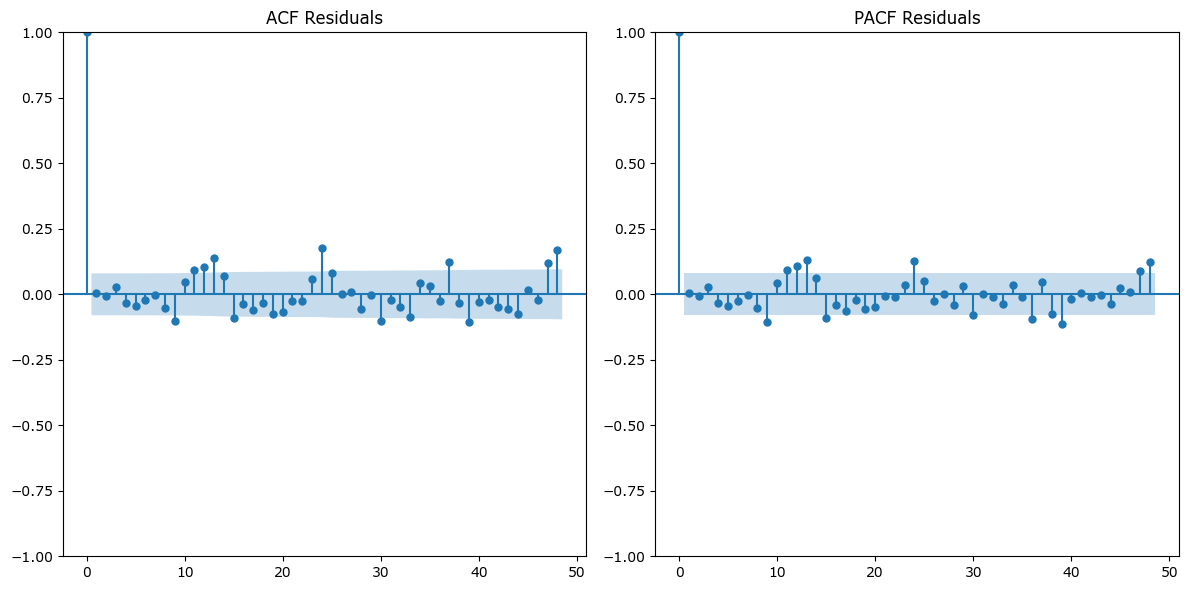

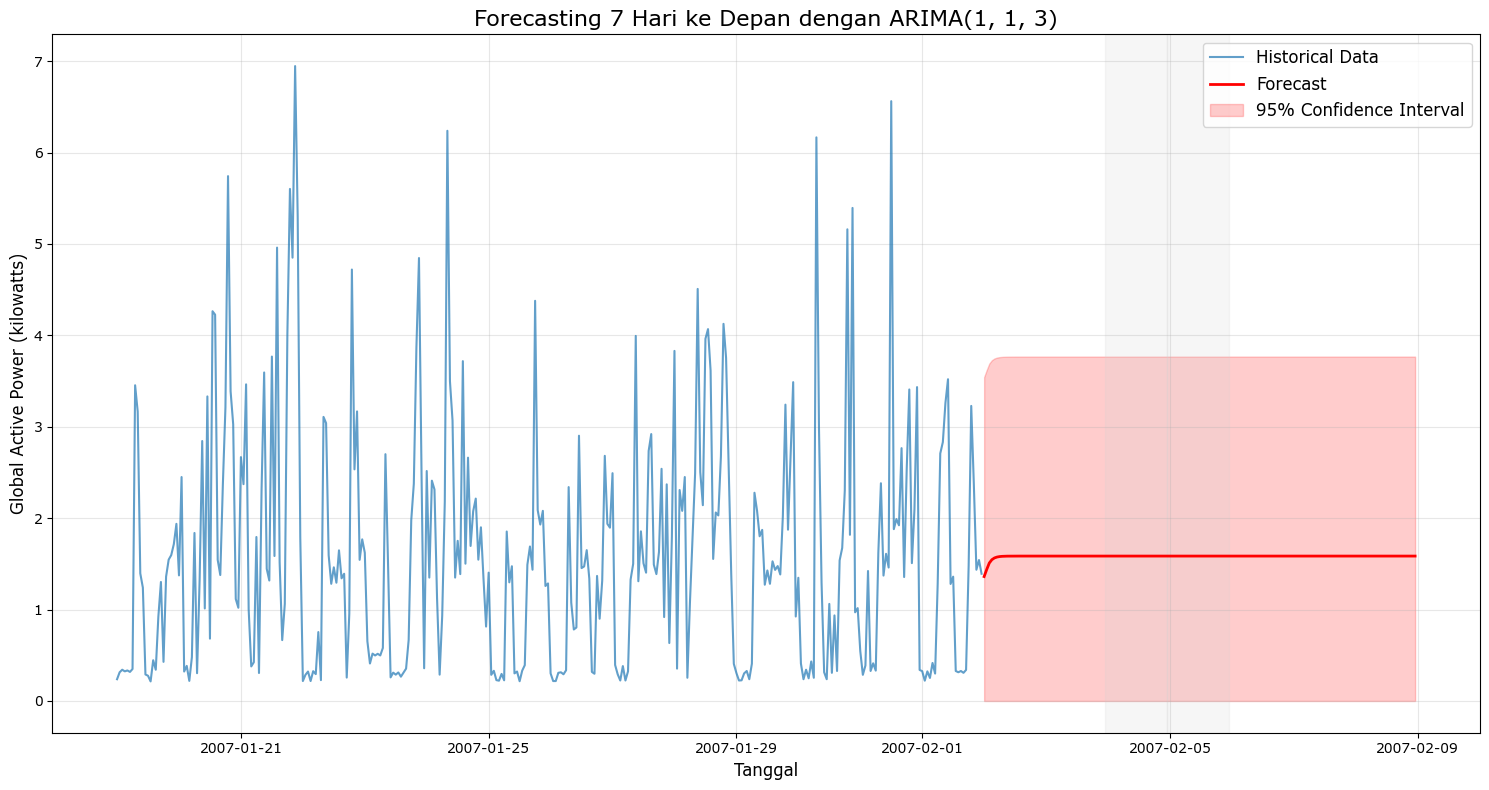


Perbandingan ARIMA vs SARIMA:
ARIMA RMSE: 1.2451
SARIMA RMSE: 1.0804
Persentase perbaikan dengan SARIMA: 13.23%


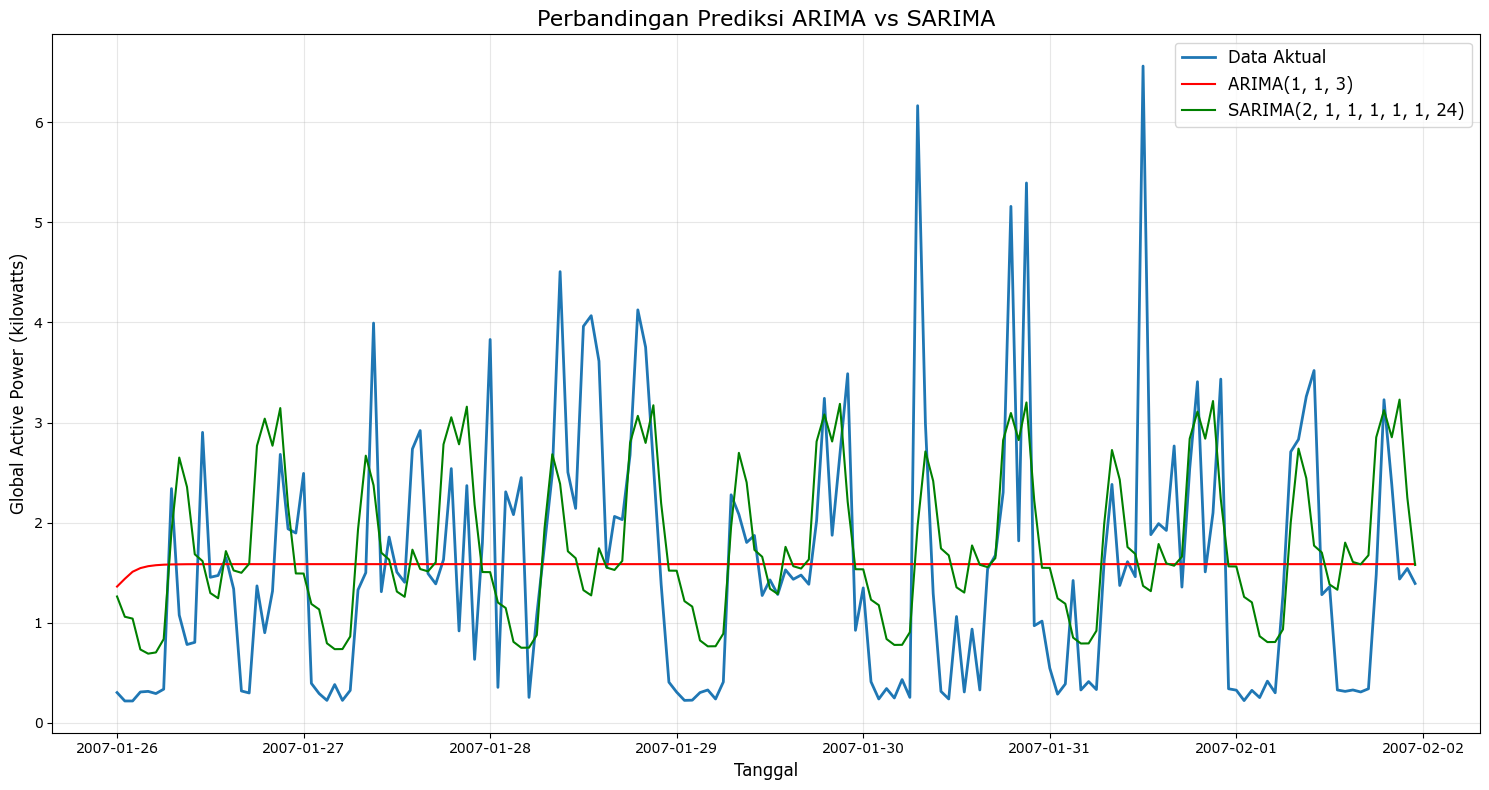

Model ARIMA terbaik telah disimpan sebagai 'best_arima_model.pkl'


In [20]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 1. Split data menjadi train dan test
train_data = df_subset['Global_active_power'].iloc[:-168]  # menggunakan data kecuali 7 hari terakhir
test_data = df_subset['Global_active_power'].iloc[-168:]   # menggunakan 7 hari terakhir untuk validasi

print(f'Jumlah data training: {len(train_data)}')
print(f'Jumlah data testing: {len(test_data)}')

# 2. Definisikan beberapa model ARIMA untuk diuji
arima_models = [
    (1, 1, 1),   # ARIMA(1,1,1)
    (2, 1, 1),   # ARIMA(2,1,1)
    (1, 1, 2),   # ARIMA(1,1,2)
    (2, 1, 2),   # ARIMA(2,1,2)
    (3, 1, 1),   # ARIMA(3,1,1)
    (1, 1, 3)    # ARIMA(1,1,3)
]

# 3. Fungsi untuk melatih dan mengevaluasi model ARIMA
def evaluate_arima(params, train, test):
    p, d, q = params
    
    # Fit model
    model = ARIMA(train, order=(p, d, q))
    results = model.fit()
    
    # Forecast
    forecast_steps = len(test)
    forecast = results.forecast(steps=forecast_steps)
    
    # Koreksi nilai negatif (tidak mungkin untuk konsumsi listrik)
    forecast = forecast.apply(lambda x: max(0, x))
    
    # Evaluasi dengan berbagai metrik
    mse = mean_squared_error(test, forecast)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(test, forecast)
    
    # Hitung MAPE (Mean Absolute Percentage Error)
    # Hindari pembagian dengan nol dengan menambahkan epsilon kecil
    epsilon = 1e-10
    mape = np.mean(np.abs((test - forecast) / (test + epsilon))) * 100
    
    return results, forecast, rmse, mae, mape

# 4. Evaluasi setiap model ARIMA
arima_results = {}

for params in arima_models:
    model_name = f"ARIMA{params}"
    print(f"\nEvaluasi model {model_name}")
    
    try:
        results, forecast, rmse, mae, mape = evaluate_arima(params, train_data, test_data)
        print(f'RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.2f}%')
        
        arima_results[model_name] = {
            'params': params,
            'rmse': rmse,
            'mae': mae,
            'mape': mape,
            'model': results,
            'forecast': forecast
        }
    except Exception as e:
        print(f"Error pada model {model_name}: {str(e)}")

# 5. Pilih model terbaik berdasarkan RMSE
if arima_results:
    best_model_name = min(arima_results, key=lambda x: arima_results[x]['rmse'])
    best_params = arima_results[best_model_name]['params']
    best_model = arima_results[best_model_name]['model']
    best_forecast = arima_results[best_model_name]['forecast']
    best_rmse = arima_results[best_model_name]['rmse']

    print(f"\nModel terbaik: {best_model_name} dengan RMSE {best_rmse:.4f}")

    # 6. Visualisasi hasil model ARIMA terbaik
    plt.figure(figsize=(15, 8))
    plt.plot(train_data.index, train_data, label='Training Data', alpha=0.7)
    plt.plot(test_data.index, test_data, label='Data Aktual', linewidth=2)
    plt.plot(test_data.index, best_forecast, label='Prediksi', color='red', linewidth=2)

    # Highlight weekend untuk konteks tambahan
    from datetime import timedelta
    for date in pd.date_range(start=test_data.index[0], end=test_data.index[-1], freq='D'):
        if date.weekday() >= 5:  # 5 = Sabtu, 6 = Minggu
            plt.axvspan(date, date + timedelta(days=1), color='lightgrey', alpha=0.3)

    plt.title(f'Forecasting dengan {best_model_name}', fontsize=16)
    plt.xlabel('Tanggal', fontsize=12)
    plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 7. Diagnosa residual dari model terbaik
    residuals = best_model.resid

    plt.figure(figsize=(15, 10))
    # Plot residual
    plt.subplot(311)
    plt.plot(residuals)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title('Time Series Residual', fontsize=14)
    plt.grid(True, alpha=0.3)

    # Histogram residual
    plt.subplot(312)
    plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
    plt.title('Histogram Residual', fontsize=14)
    plt.grid(True, alpha=0.3)

    # Plot ACF/PACF residual
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plot_acf(residuals, ax=plt.gca(), lags=48, title='ACF Residuals')
    plt.subplot(122)
    plot_pacf(residuals, ax=plt.gca(), lags=48, title='PACF Residuals')
    plt.tight_layout()
    plt.show()

    # 8. Prediksi 7 hari ke depan
    future_steps = 24*7  # 7 hari dengan interval per jam
    forecast_future = best_model.forecast(steps=future_steps)
    
    # Koreksi nilai negatif
    forecast_future = forecast_future.apply(lambda x: max(0, x))
    
    # Hitung interval kepercayaan
    # Untuk model ARIMA sederhana, kita buat simulasi interval kepercayaan
    std_resid = np.std(residuals)
    forecast_ci_lower = forecast_future - 1.96 * std_resid
    forecast_ci_upper = forecast_future + 1.96 * std_resid
    
    # Koreksi nilai negatif pada interval kepercayaan bawah
    forecast_ci_lower = forecast_ci_lower.apply(lambda x: max(0, x))
    
    # Plot forecast
    plt.figure(figsize=(15, 8))
    plt.plot(df_subset.index[-24*14:], df_subset['Global_active_power'][-24*14:], 
            label='Historical Data', alpha=0.7)
    plt.plot(pd.date_range(start=test_data.index[-1] + pd.Timedelta(hours=1), 
                           periods=future_steps, 
                           freq='H'), 
            forecast_future, 
            color='red', 
            label='Forecast', 
            linewidth=2)
            
    # Plot interval kepercayaan
    plt.fill_between(pd.date_range(start=test_data.index[-1] + pd.Timedelta(hours=1), 
                                 periods=future_steps, 
                                 freq='H'),
                   forecast_ci_lower,
                   forecast_ci_upper,
                   color='red', alpha=0.2, label='95% Confidence Interval')

    # Highlight weekend
    for date in pd.date_range(start=test_data.index[-1], 
                              end=test_data.index[-1] + pd.Timedelta(days=7), 
                              freq='D'):
        if date.weekday() >= 5:  # 5 = Sabtu, 6 = Minggu
            plt.axvspan(date, date + timedelta(days=1), color='lightgrey', alpha=0.2)

    plt.title(f'Forecasting 7 Hari ke Depan dengan {best_model_name}', fontsize=16)
    plt.xlabel('Tanggal', fontsize=12)
    plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 9. Bandingkan performa ARIMA dengan SARIMA
    try:
        # Import SARIMA untuk perbandingan
        from statsmodels.tsa.statespace.sarimax import SARIMAX
        
        # Asumsi pakai model SARIMA(2,1,1)(1,1,1,24)
        sarima_params = (2, 1, 1, 1, 1, 1, 24)
        
        sarima_model = SARIMAX(train_data, 
                           order=sarima_params[:3], 
                           seasonal_order=sarima_params[3:],
                           enforce_stationarity=False,
                           enforce_invertibility=False)
        
        sarima_results = sarima_model.fit(disp=False)
        sarima_forecast = sarima_results.get_forecast(steps=len(test_data)).predicted_mean
        sarima_forecast = sarima_forecast.apply(lambda x: max(0, x))
        
        sarima_rmse = math.sqrt(mean_squared_error(test_data, sarima_forecast))
        sarima_mae = mean_absolute_error(test_data, sarima_forecast)
        
        print("\nPerbandingan ARIMA vs SARIMA:")
        print(f"ARIMA RMSE: {best_rmse:.4f}")
        print(f"SARIMA RMSE: {sarima_rmse:.4f}")
        print(f"Persentase perbaikan dengan SARIMA: {((best_rmse - sarima_rmse) / best_rmse) * 100:.2f}%")
        
        # Plot perbandingan hasil ARIMA dan SARIMA
        plt.figure(figsize=(15, 8))
        plt.plot(test_data.index, test_data, label='Data Aktual', linewidth=2)
        plt.plot(test_data.index, best_forecast, label=f'ARIMA{best_params}', color='red', linewidth=1.5)
        plt.plot(test_data.index, sarima_forecast, label=f'SARIMA{sarima_params}', color='green', linewidth=1.5)
        
        plt.title('Perbandingan Prediksi ARIMA vs SARIMA', fontsize=16)
        plt.xlabel('Tanggal', fontsize=12)
        plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error dalam perbandingan ARIMA vs SARIMA: {str(e)}")
        
    # 10. Simpan model ARIMA terbaik
    import joblib
    joblib.dump(best_model, 'best_arima_model.pkl')
    print("Model ARIMA terbaik telah disimpan sebagai 'best_arima_model.pkl'")
else:
    print("Tidak ada model ARIMA yang berhasil dilatih")

Jumlah data training: 600
Jumlah data testing: 168
Total akan dicoba 77 model SARIMA

Memulai grid search SARIMA...


100%|██████████| 77/77 [15:48<00:00, 12.31s/it]



Top 5 model SARIMA berdasarkan RMSE:
    p  d  q  P  D  Q   s      rmse       mae        mape          aic  \
38  2  1  1  0  1  1  24  1.073774  0.803963  110.347950  1686.446221   
53  1  1  2  0  1  1  24  1.073961  0.805199  110.811535  1686.577221   
48  2  1  2  0  1  1  24  1.074027  0.804410  110.600881  1685.479607   
43  1  1  1  1  1  1  24  1.074928  0.805694  111.511943  1699.079503   
6   3  1  1  0  1  1  24  1.075419  0.807631  111.706630  1687.767468   

            bic  
38  1707.986714  
53  1708.108597  
48  1711.317259  
43  1720.619995  
6   1713.616059  

Model SARIMA terbaik: SARIMA(np.int64(2), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(24))
RMSE: 1.0738, MAPE: 110.35%


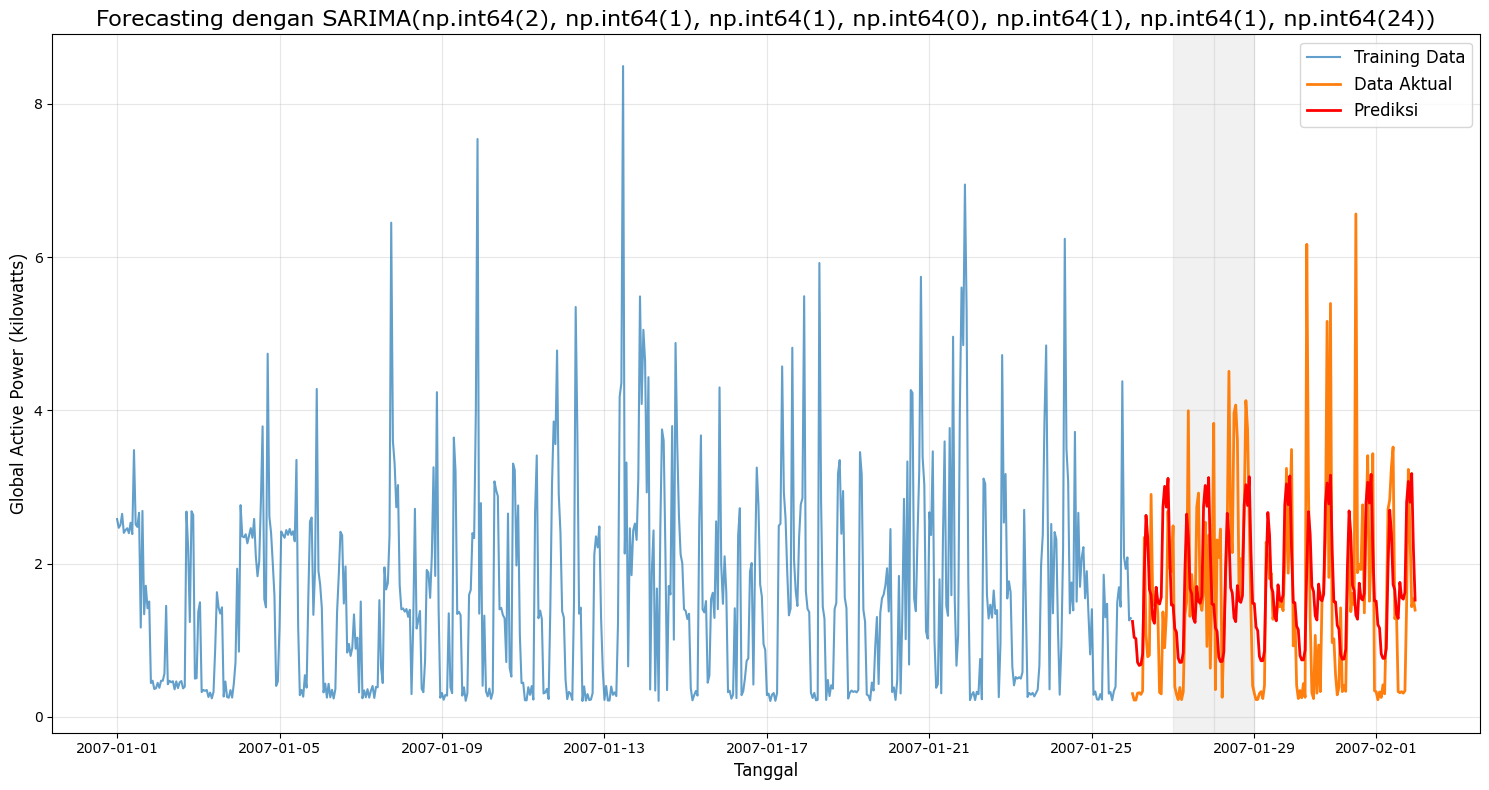


Diagnostik residual:
Mean residual: 0.019234
Std residual: 1.098471


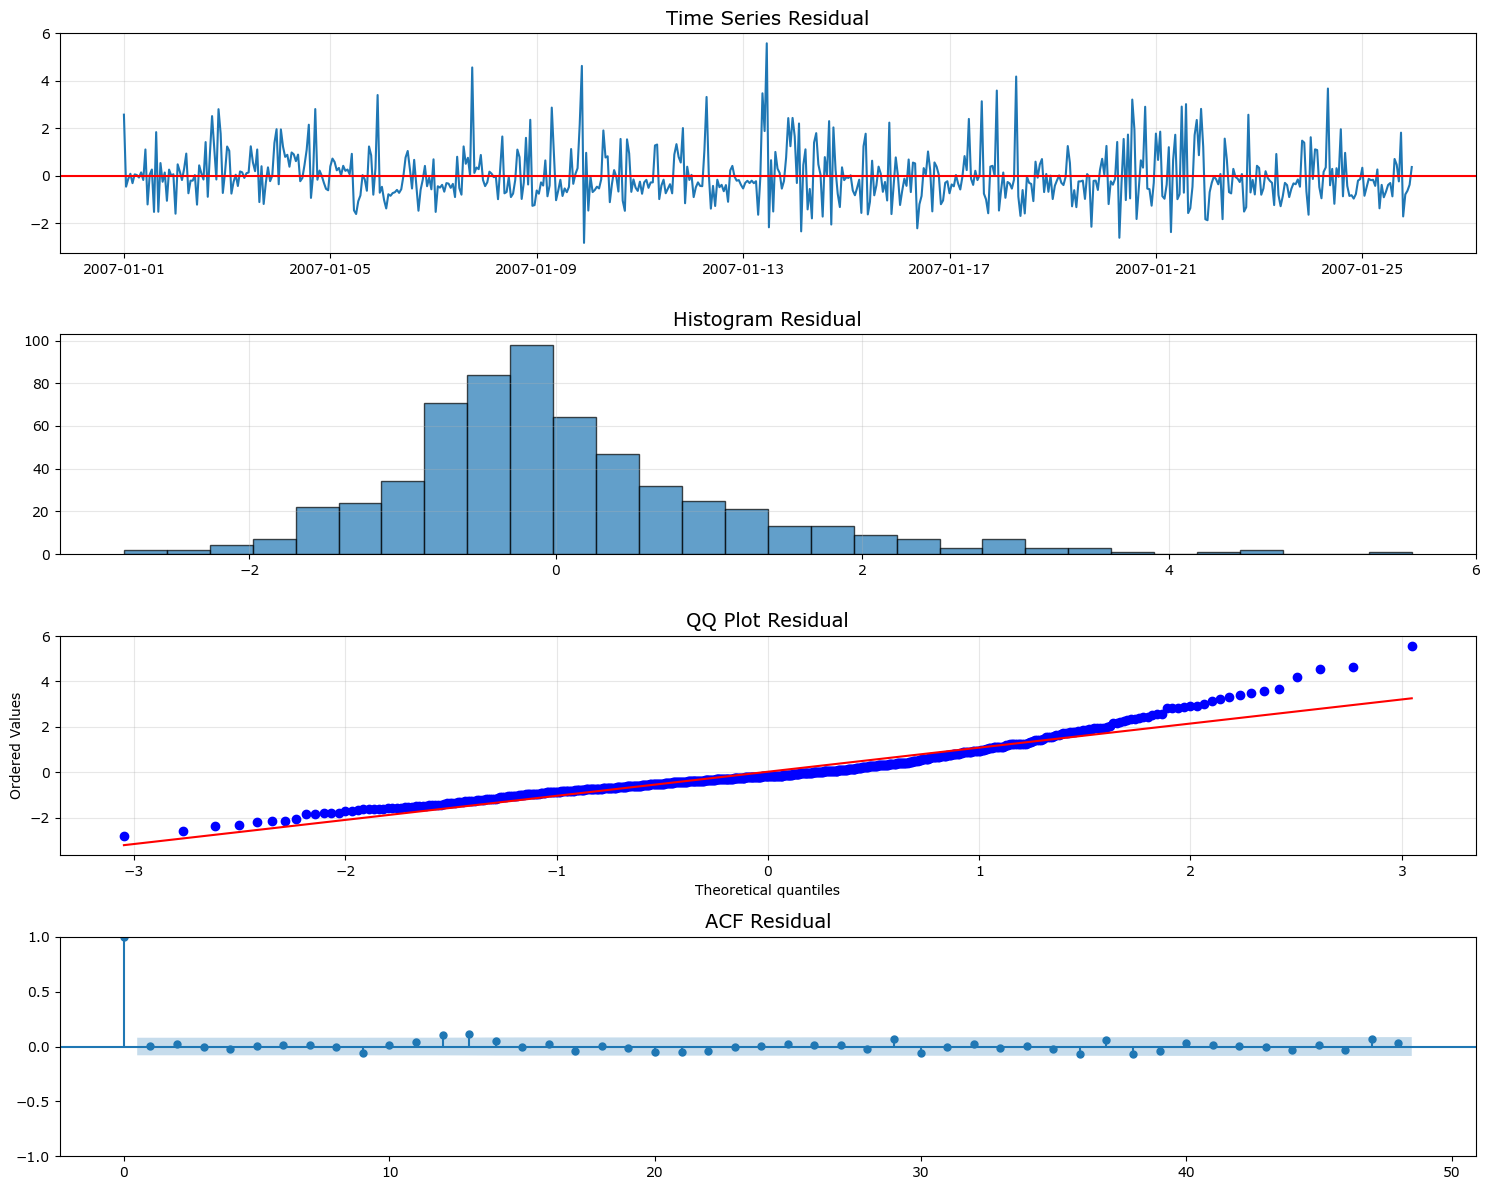

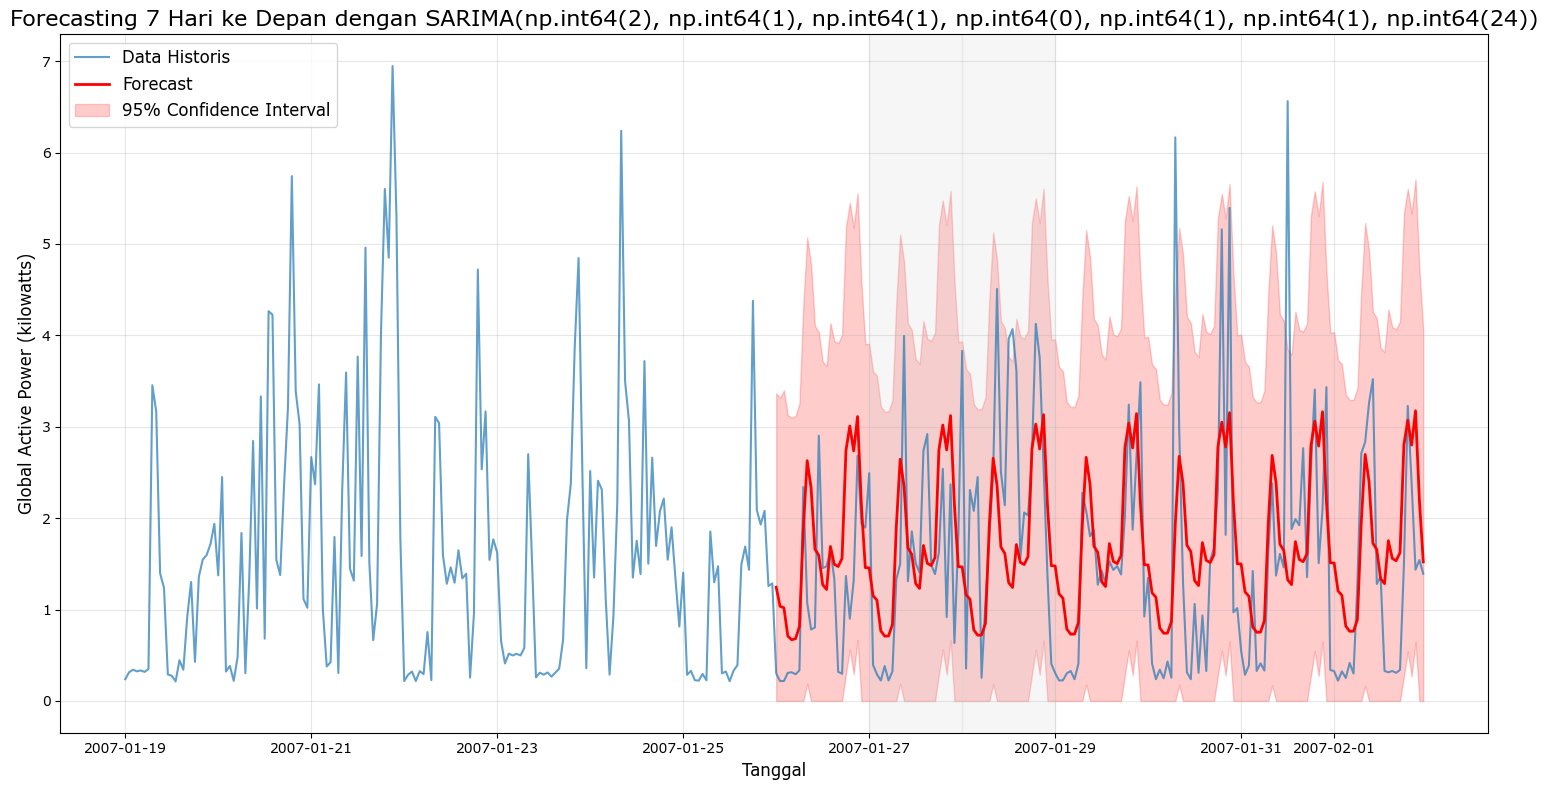

Model SARIMA terbaik telah disimpan sebagai 'best_sarima_tuned_model.pkl'


In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import warnings
import numpy as np
import itertools
from tqdm import tqdm
warnings.filterwarnings('ignore')

# 1. Split data menjadi train dan test
train_data = df_subset['Global_active_power'].iloc[:-168]  # menggunakan data kecuali 7 hari terakhir
test_data = df_subset['Global_active_power'].iloc[-168:]   # menggunakan 7 hari terakhir untuk validasi

print(f'Jumlah data training: {len(train_data)}')
print(f'Jumlah data testing: {len(test_data)}')

# 2. Definisikan parameter grid yang lebih komprehensif
# Berdasarkan ACF dan PACF yang sudah dilihat sebelumnya
p = range(0, 4)       # AR parameter
d = [1]               # I parameter (differencing)
q = range(0, 4)       # MA parameter
P = range(0, 3)       # Seasonal AR
D = [1]               # Seasonal differencing
Q = range(0, 3)       # Seasonal MA
s = [24]              # Seasonal period (24 jam)

# 3. Buat kombinasi parameter yang akan dicoba
# Batasi jumlah model untuk efisiensi
param_combinations = list(itertools.product(p, d, q, P, D, Q, s))

# Filter parameter untuk mengurangi jumlah model
filtered_combinations = []
for params in param_combinations:
    # Batasi kompleksitas total model
    if sum(params[:3]) <= 5 and sum(params[3:6]) <= 3:
        # Pastikan setidaknya salah satu AR atau MA digunakan
        if params[0] > 0 or params[2] > 0 or params[3] > 0 or params[5] > 0:
            filtered_combinations.append(params)

# Tambahkan model yang sudah terbukti baik dari percobaan sebelumnya
filtered_combinations.extend([
    (2, 1, 1, 1, 1, 1, 24),  # SARIMA(2,1,1)(1,1,1)24 - model baseline yang bagus
    (1, 1, 2, 1, 1, 1, 24),  # SARIMA(1,1,2)(1,1,1)24
    (2, 1, 2, 1, 1, 1, 24)   # SARIMA(2,1,2)(1,1,1)24
])

# Pastikan tidak ada duplikat
filtered_combinations = list(set(filtered_combinations))

print(f"Total akan dicoba {len(filtered_combinations)} model SARIMA")

# 4. Fungsi untuk evaluasi model
def evaluate_sarima_model(params, train, test):
    p, d, q, P, D, Q, s = params
    
    try:
        # Buat dan latih model
        model = SARIMAX(
            train,
            order=(p, d, q),
            seasonal_order=(P, D, Q, s),
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        
        # Gunakan metode yang lebih robust untuk fitting
        results = model.fit(disp=False, maxiter=300, method='lbfgs')
        
        # Forecast
        forecast = results.get_forecast(steps=len(test))
        forecast_mean = forecast.predicted_mean
        
        # Koreksi nilai negatif
        forecast_mean = forecast_mean.apply(lambda x: max(0, x))
        
        # Kalkulasi metrik error
        mse = mean_squared_error(test, forecast_mean)
        rmse = math.sqrt(mse)
        mae = mean_absolute_error(test, forecast_mean)
        
        # Kalkulasi MAPE dengan penanganan nilai nol
        epsilon = 1e-10
        mape = np.mean(np.abs((test - forecast_mean) / (test + epsilon))) * 100
        
        # Hitung AIC dan BIC
        aic = results.aic
        bic = results.bic
        
        return results, forecast_mean, rmse, mae, mape, aic, bic
    
    except Exception as e:
        print(f"Error dengan parameter {params}: {str(e)}")
        return None, None, float('inf'), float('inf'), float('inf'), float('inf'), float('inf')

# 5. Grid search dengan progress bar
results_df = []

print("\nMemulai grid search SARIMA...")
for params in tqdm(filtered_combinations):
    model, forecast, rmse, mae, mape, aic, bic = evaluate_sarima_model(params, train_data, test_data)
    
    if model is not None:
        results_df.append({
            'p': params[0], 'd': params[1], 'q': params[2],
            'P': params[3], 'D': params[4], 'Q': params[5], 's': params[6],
            'rmse': rmse, 'mae': mae, 'mape': mape, 'aic': aic, 'bic': bic,
            'model': model, 'forecast': forecast
        })

# 6. Konversi hasil ke DataFrame
import pandas as pd
results_df = pd.DataFrame(results_df)
results_df = results_df.sort_values('rmse')

# 7. Tampilkan top 5 model terbaik
print("\nTop 5 model SARIMA berdasarkan RMSE:")
print(results_df[['p', 'd', 'q', 'P', 'D', 'Q', 's', 'rmse', 'mae', 'mape', 'aic', 'bic']].head())

# 8. Pilih model terbaik
best_model_idx = results_df['rmse'].idxmin()
best_model = results_df.loc[best_model_idx, 'model']
best_forecast = results_df.loc[best_model_idx, 'forecast']
best_params = (
    results_df.loc[best_model_idx, 'p'],
    results_df.loc[best_model_idx, 'd'],
    results_df.loc[best_model_idx, 'q'],
    results_df.loc[best_model_idx, 'P'],
    results_df.loc[best_model_idx, 'D'],
    results_df.loc[best_model_idx, 'Q'],
    results_df.loc[best_model_idx, 's']
)

best_rmse = results_df.loc[best_model_idx, 'rmse']
best_mape = results_df.loc[best_model_idx, 'mape']

print(f"\nModel SARIMA terbaik: SARIMA{best_params}")
print(f"RMSE: {best_rmse:.4f}, MAPE: {best_mape:.2f}%")

# 9. Visualisasi hasil prediksi model terbaik
import matplotlib.pyplot as plt
from datetime import timedelta

plt.figure(figsize=(15, 8))
plt.plot(train_data.index, train_data, label='Training Data', alpha=0.7)
plt.plot(test_data.index, test_data, label='Data Aktual', linewidth=2)
plt.plot(test_data.index, best_forecast, label='Prediksi', color='red', linewidth=2)

# Highlight weekend untuk konteks
for date in pd.date_range(start=test_data.index[0], end=test_data.index[-1], freq='D'):
    if date.weekday() >= 5:  # 5=Sabtu, 6=Minggu
        plt.axvspan(date, date + timedelta(days=1), color='lightgrey', alpha=0.3)

plt.title(f'Forecasting dengan SARIMA{best_params}', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 10. Diagnosa residual model terbaik
residuals = best_model.resid

# Statistik residual
print("\nDiagnostik residual:")
print(f"Mean residual: {residuals.mean():.6f}")
print(f"Std residual: {residuals.std():.6f}")

plt.figure(figsize=(15, 12))
# Plot time series residual
plt.subplot(411)
plt.plot(residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Time Series Residual', fontsize=14)
plt.grid(True, alpha=0.3)

# Histogram residual
plt.subplot(412)
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram Residual', fontsize=14)
plt.grid(True, alpha=0.3)

# QQ plot
import scipy.stats as stats
plt.subplot(413)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot Residual', fontsize=14)
plt.grid(True, alpha=0.3)

# ACF residual
from statsmodels.graphics.tsaplots import plot_acf
plt.subplot(414)
plot_acf(residuals, lags=48, alpha=0.05, ax=plt.gca())
plt.title('ACF Residual', fontsize=14)
plt.tight_layout()
plt.show()

# 11. Forecast 7 hari ke depan dengan model terbaik
future_steps = 24*7  # 7 hari dengan interval per jam
future_forecast = best_model.get_forecast(steps=future_steps)
forecast_mean = future_forecast.predicted_mean
forecast_ci = future_forecast.conf_int(alpha=0.05)  # 95% confidence interval

# Koreksi untuk nilai negatif
forecast_mean = forecast_mean.apply(lambda x: max(0, x))
forecast_ci.iloc[:, 0] = forecast_ci.iloc[:, 0].apply(lambda x: max(0, x))

# Plot forecast yang lebih baik
plt.figure(figsize=(15, 8))
plt.plot(df_subset.index[-24*14:], df_subset['Global_active_power'][-24*14:], 
         label='Data Historis', alpha=0.7)
plt.plot(forecast_mean.index, forecast_mean, color='red', 
         label='Forecast', linewidth=2)
plt.fill_between(forecast_ci.index, 
                 forecast_ci.iloc[:, 0], 
                 forecast_ci.iloc[:, 1], 
                 color='red', alpha=0.2, label='95% Confidence Interval')

# Highlight akhir pekan
for date in pd.date_range(start=forecast_mean.index[0], end=forecast_mean.index[-1], freq='D'):
    if date.weekday() >= 5:
        plt.axvspan(date, date + timedelta(days=1), color='lightgrey', alpha=0.2)

plt.title(f'Forecasting 7 Hari ke Depan dengan SARIMA{best_params}', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 12. Simpan model terbaik untuk penggunaan mendatang
import joblib
joblib.dump(best_model, 'best_sarima_tuned_model.pkl')
print("Model SARIMA terbaik telah disimpan sebagai 'best_sarima_tuned_model.pkl'")

X_train shape: (576, 24, 1)
y_train shape: (576,)
Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.0343 - val_loss: 0.0249
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0266 - val_loss: 0.0232
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0314 - val_loss: 0.0231
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0248 - val_loss: 0.0224
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0268 - val_loss: 0.0225
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0237 - val_loss: 0.0218
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0325 - val_loss: 0.0233
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0227 - val_loss: 0.0216
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0284 - val_loss: 0.0213
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0244 - val_loss: 0.0208
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0267 - val_loss: 0.0207
Epoch 12/50
1

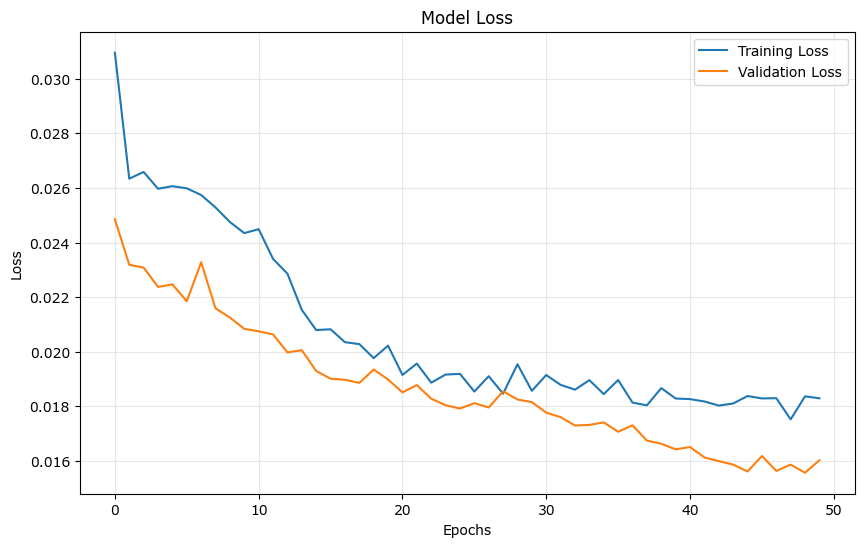

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step
LSTM RMSE: 1.1536
LSTM MAE: 0.8307
LSTM MAPE: 95.35%


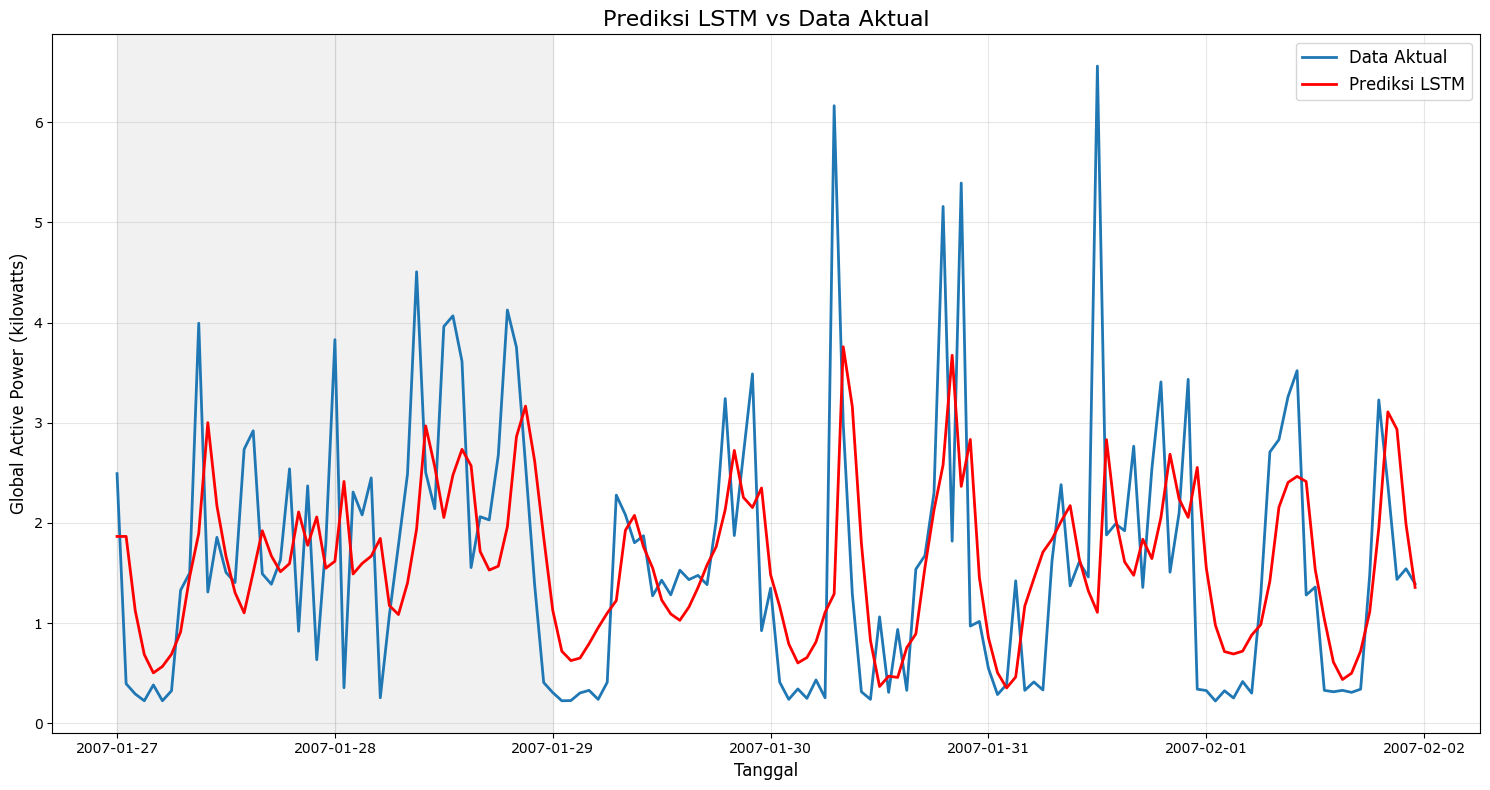

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━

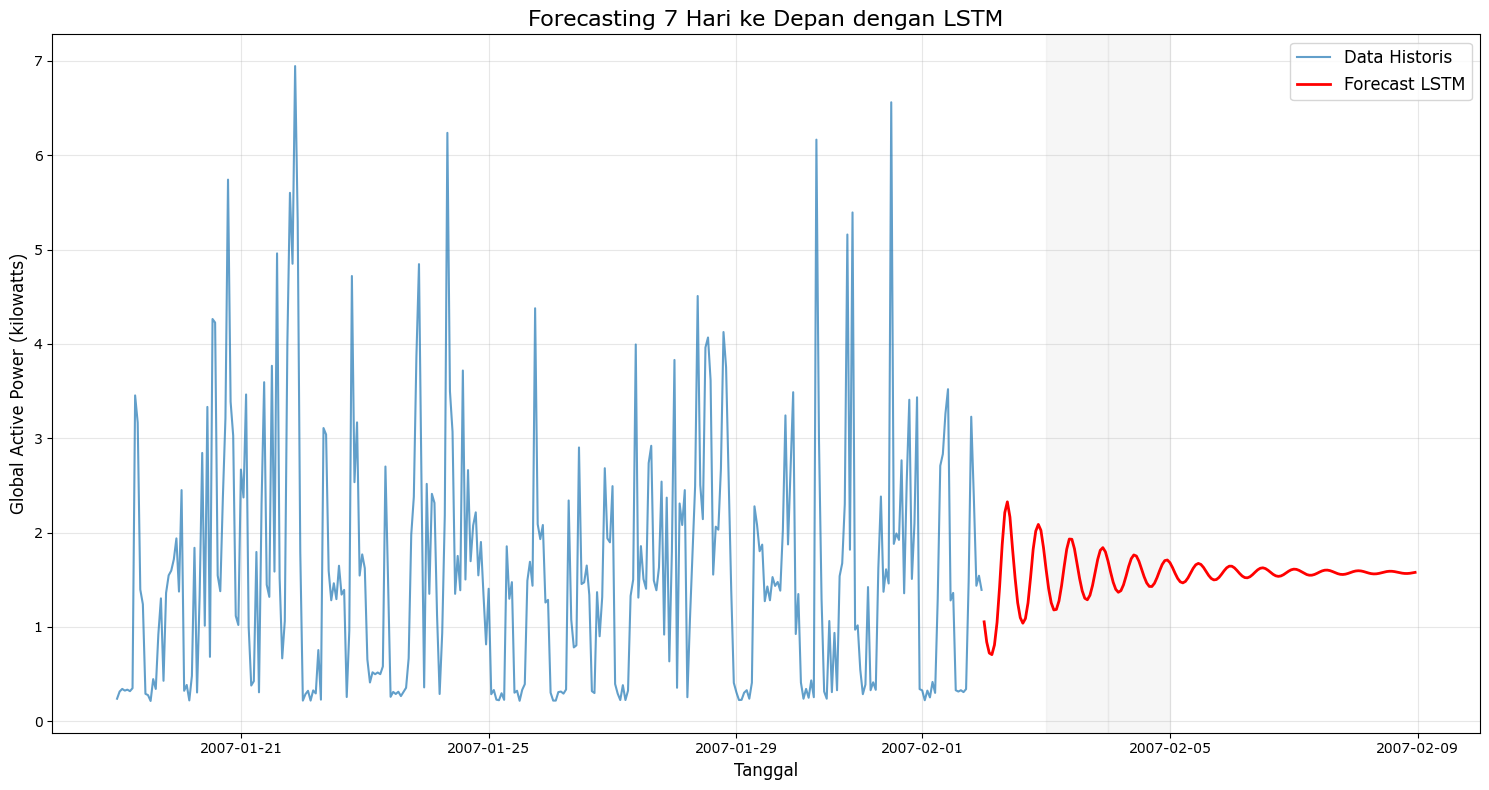

Model LSTM telah disimpan sebagai 'best_lstm_model.h5'

Perbandingan LSTM vs SARIMA:
LSTM RMSE: 1.1536
SARIMA RMSE: 1.0967
SARIMA lebih baik dengan peningkatan 4.93%


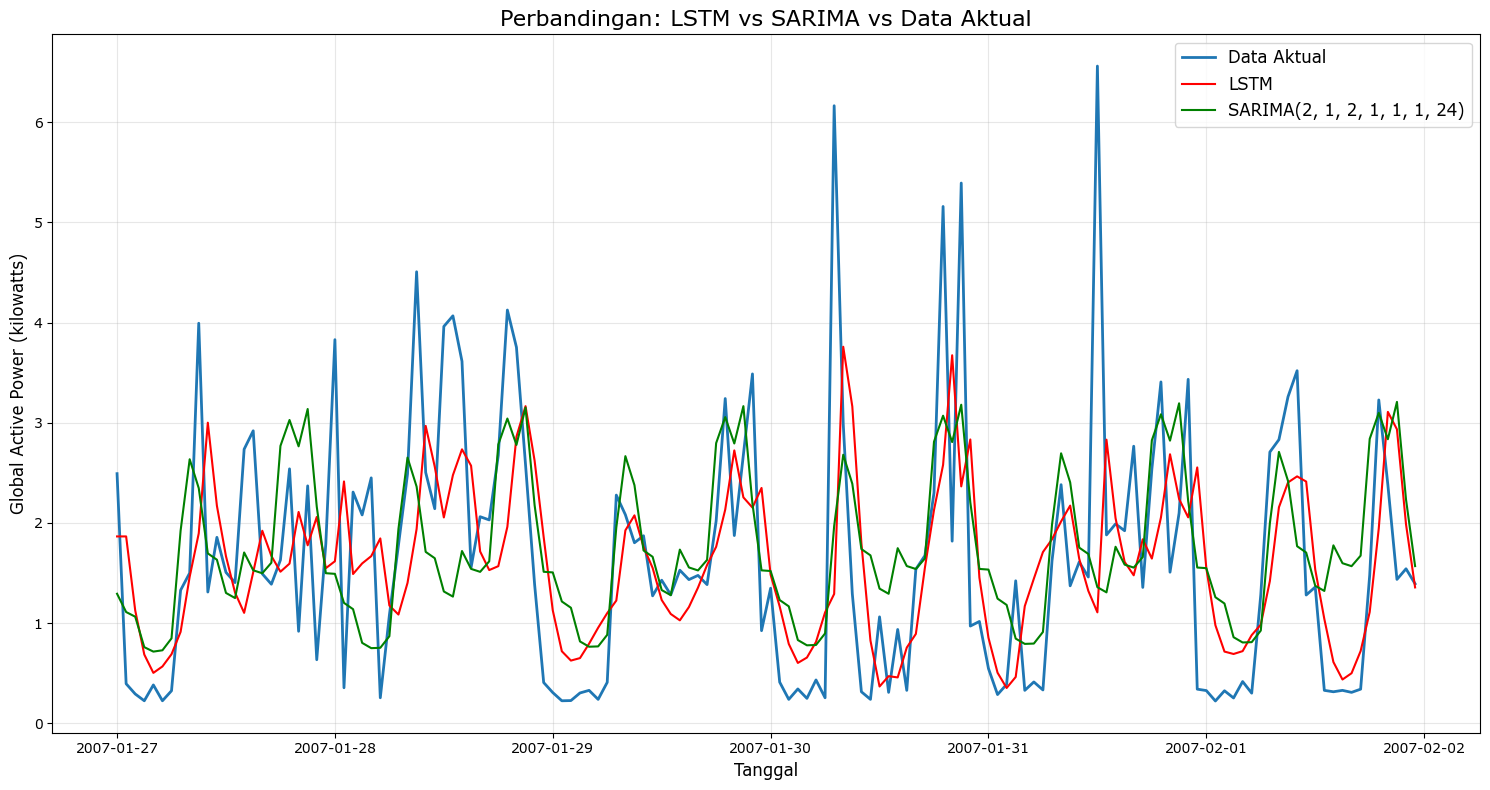

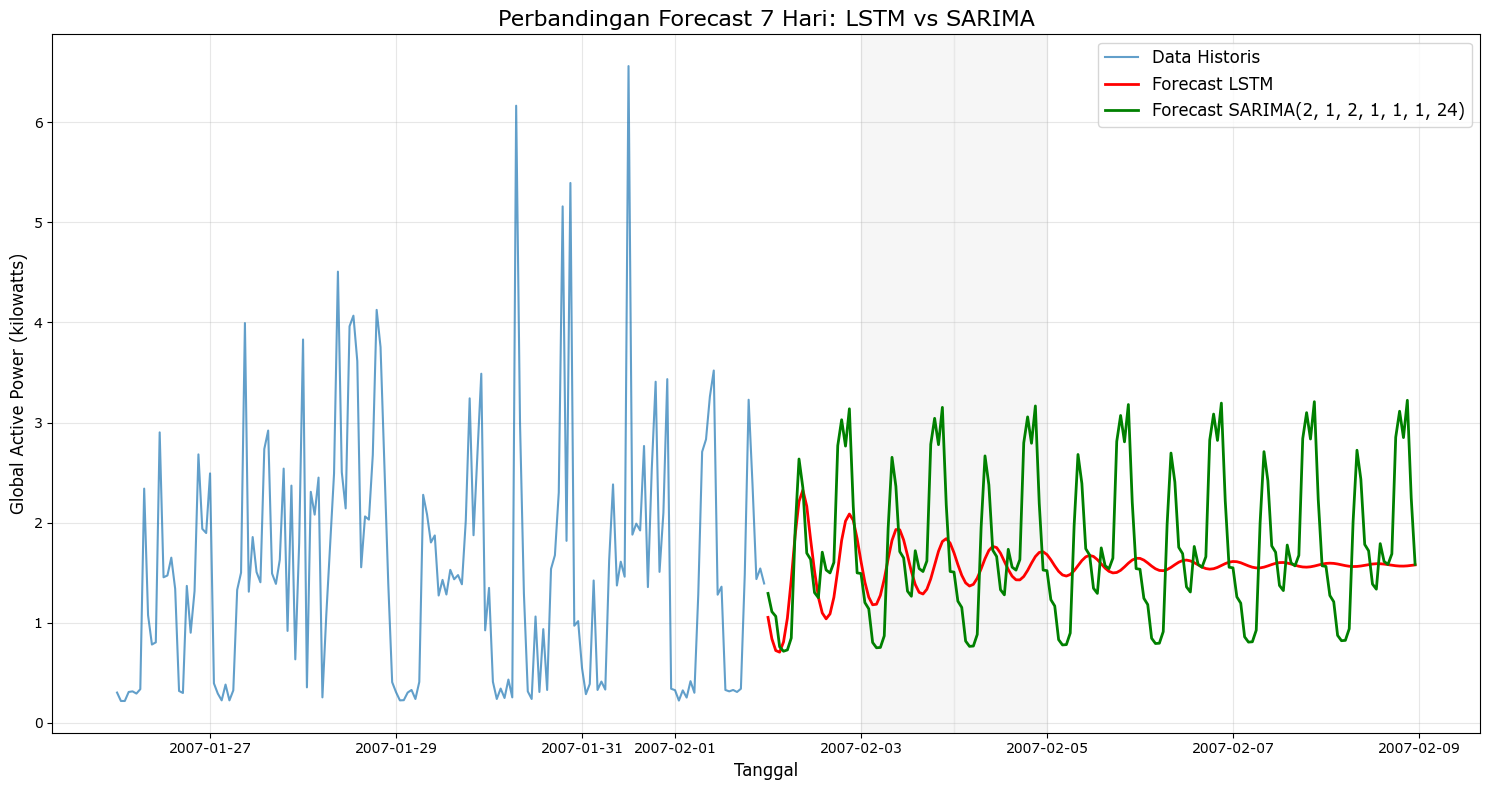

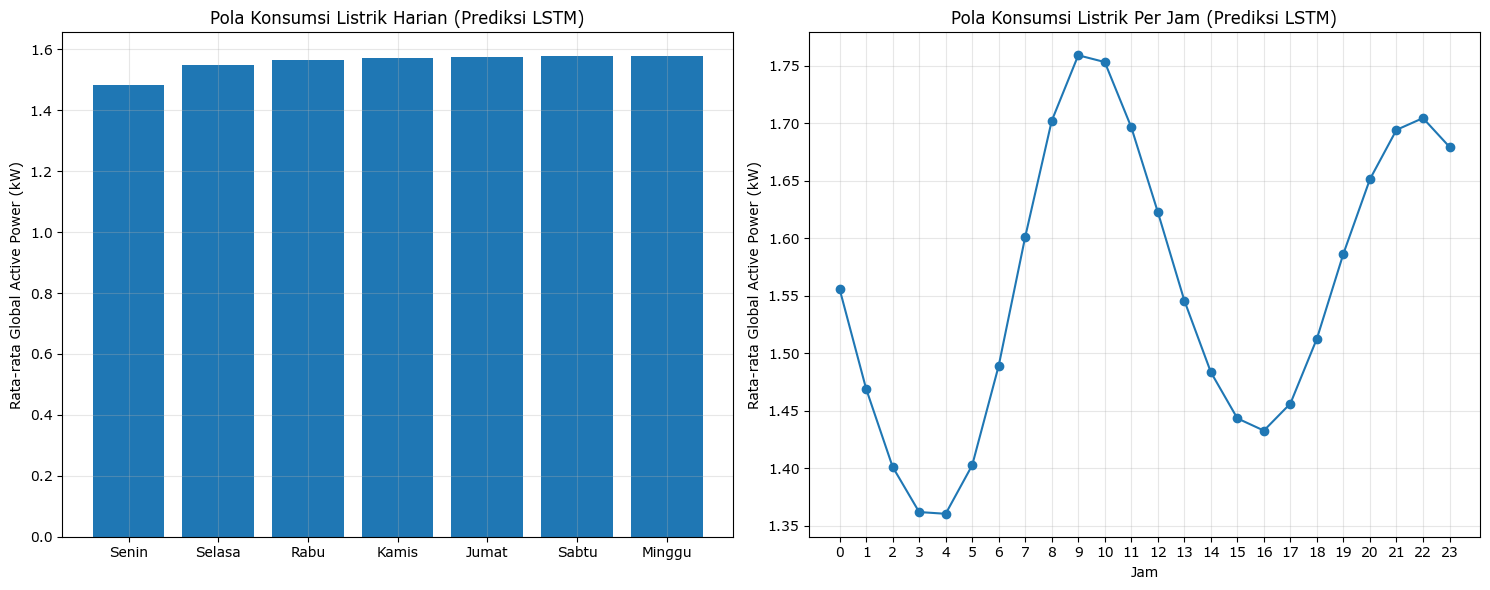

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Import Keras/TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Fungsi untuk membuat dataset time series format LSTM
def create_lstm_dataset(dataset, time_steps=24):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:(i + time_steps), 0])
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

# 1. Split data menjadi train dan test
train_data = df_subset['Global_active_power'].iloc[:-168].values  # menggunakan data kecuali 7 hari terakhir
test_data = df_subset['Global_active_power'].iloc[-168:].values   # menggunakan 7 hari terakhir untuk validasi

# 2. Scaling data antara 0 dan 1 (LSTM sensitif terhadap skala data)
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data.reshape(-1, 1))
test_scaled = scaler.transform(test_data.reshape(-1, 1))

# 3. Membuat dataset dengan format input LSTM
# Gunakan 24 jam sebelumnya untuk memprediksi jam berikutnya
time_steps = 24
X_train, y_train = create_lstm_dataset(train_scaled, time_steps)
X_test, y_test = create_lstm_dataset(test_scaled, time_steps)


In [ ]:

# 4. Reshape input untuk LSTM [samples, time_steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

# 5. Bangun model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# 6. Early stopping untuk mencegah overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 7. Train model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# 8. Plot history loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 9. Prediksi pada data test
y_pred = model.predict(X_test)

# 10. Invers transform untuk mendapatkan nilai sebenarnya
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# 11. Evaluasi model
rmse = math.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / (y_test_inv + 1e-10))) * 100

print(f'LSTM RMSE: {rmse:.4f}')
print(f'LSTM MAE: {mae:.4f}')
print(f'LSTM MAPE: {mape:.2f}%')

# 12. Visualisasi hasil prediksi pada data test
# Membuat array tanggal untuk plot
test_dates = df_subset.index[-(168-time_steps):]

plt.figure(figsize=(15, 8))
plt.plot(test_dates, y_test_inv, label='Data Aktual', linewidth=2)
plt.plot(test_dates, y_pred_inv, label='Prediksi LSTM', color='red', linewidth=2)

# Highlight weekend untuk konteks
for date in pd.date_range(start=test_dates[0], end=test_dates[-1], freq='D'):
    if date.weekday() >= 5:  # 5=Sabtu, 6=Minggu
        plt.axvspan(date, date + timedelta(days=1), color='lightgrey', alpha=0.3)

plt.title('Prediksi LSTM vs Data Aktual', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 13. Forecast 7 hari ke depan
# Ambil 24 data terakhir untuk input prediksi
last_sequence = test_scaled[-time_steps:].reshape(1, time_steps, 1)

forecasted_values = []
current_sequence = last_sequence.copy()

for _ in range(24*7):  # 7 hari, prediksi per jam
    # Prediksi nilai berikutnya
    next_value = model.predict(current_sequence)[0, 0]
    forecasted_values.append(next_value)
    
    # Perbarui sequence untuk prediksi berikutnya - FIXED
    next_value_reshaped = np.array([[[next_value]]])  # Shape (1,1,1) untuk concatenate
    current_sequence = np.concatenate((current_sequence[:, 1:, :], next_value_reshaped), axis=1)

# Inverse transform hasil forecast
forecasted_values_inv = scaler.inverse_transform(np.array(forecasted_values).reshape(-1, 1))

# Buat index tanggal untuk forecast
forecast_dates = pd.date_range(
    start=df_subset.index[-1] + pd.Timedelta(hours=1),
    periods=len(forecasted_values),
    freq='H'
)

# Plot hasil forecast 7 hari ke depan
plt.figure(figsize=(15, 8))
plt.plot(df_subset.index[-14*24:], df_subset['Global_active_power'][-14*24:], 
         label='Data Historis', alpha=0.7)
plt.plot(forecast_dates, forecasted_values_inv, color='red', 
         label='Forecast LSTM', linewidth=2)

# Highlight weekend
for date in pd.date_range(start=forecast_dates[0], end=forecast_dates[-1], freq='D'):
    if date.weekday() >= 5:  # 5=Sabtu, 6=Minggu
        plt.axvspan(date, date + timedelta(days=1), color='lightgrey', alpha=0.2)

plt.title('Forecasting 7 Hari ke Depan dengan LSTM', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 14. Simpan model LSTM
model.save('best_lstm_model.h5')
print("Model LSTM telah disimpan sebagai 'best_lstm_model.h5'")

# 15. Bandingkan LSTM dengan model SARIMA terbaik
try:
    # Import SARIMA untuk perbandingan
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    
    # Asumsi parameter SARIMA terbaik dari hasil grid search sebelumnya
    sarima_params = (2, 1, 2, 1, 1, 1, 24)  # Sesuaikan dengan hasil tuning Anda
    
    sarima_model = SARIMAX(
        df_subset['Global_active_power'].iloc[:-168], 
        order=sarima_params[:3], 
        seasonal_order=sarima_params[3:],
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    
    sarima_results = sarima_model.fit(disp=False)
    sarima_forecast = sarima_results.get_forecast(steps=168-time_steps).predicted_mean
    sarima_forecast = sarima_forecast.apply(lambda x: max(0, x))
    
    sarima_rmse = math.sqrt(mean_squared_error(y_test_inv, sarima_forecast))
    
    print("\nPerbandingan LSTM vs SARIMA:")
    print(f"LSTM RMSE: {rmse:.4f}")
    print(f"SARIMA RMSE: {sarima_rmse:.4f}")
    
    if rmse < sarima_rmse:
        improvement = ((sarima_rmse - rmse) / sarima_rmse) * 100
        print(f"LSTM lebih baik dengan peningkatan {improvement:.2f}%")
    else:
        improvement = ((rmse - sarima_rmse) / rmse) * 100
        print(f"SARIMA lebih baik dengan peningkatan {improvement:.2f}%")
    
    # Visualisasi perbandingan
    plt.figure(figsize=(15, 8))
    plt.plot(test_dates, y_test_inv, label='Data Aktual', linewidth=2)
    plt.plot(test_dates, y_pred_inv, label='LSTM', color='red', linewidth=1.5)
    plt.plot(test_dates, sarima_forecast, label=f'SARIMA{sarima_params}', color='green', linewidth=1.5)
    
    plt.title('Perbandingan: LSTM vs SARIMA vs Data Aktual', fontsize=16)
    plt.xlabel('Tanggal', fontsize=12)
    plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Prediksi 7 hari ke depan dengan SARIMA dan bandingkan dengan LSTM
    sarima_future = sarima_results.get_forecast(steps=24*7).predicted_mean
    sarima_future = sarima_future.apply(lambda x: max(0, x))
    
    plt.figure(figsize=(15, 8))
    plt.plot(df_subset.index[-7*24:], df_subset['Global_active_power'][-7*24:], 
             label='Data Historis', alpha=0.7)
    plt.plot(forecast_dates, forecasted_values_inv, 
             label='Forecast LSTM', color='red', linewidth=2)
    plt.plot(forecast_dates, sarima_future, 
             label=f'Forecast SARIMA{sarima_params}', color='green', linewidth=2)
    
    # Highlight weekend
    for date in pd.date_range(start=forecast_dates[0], end=forecast_dates[-1], freq='D'):
        if date.weekday() >= 5:  # 5=Sabtu, 6=Minggu
            plt.axvspan(date, date + timedelta(days=1), color='lightgrey', alpha=0.2)
    
    plt.title('Perbandingan Forecast 7 Hari: LSTM vs SARIMA', fontsize=16)
    plt.xlabel('Tanggal', fontsize=12)
    plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error dalam perbandingan: {str(e)}")
    
# 16. Analisis pola forecast LSTM
weekly_pattern = forecasted_values_inv.reshape(7, 24)
daily_means = np.mean(weekly_pattern, axis=1)
hourly_means = np.mean(weekly_pattern, axis=0)

# Visualisasi pola harian dan jam
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pola konsumsi berdasarkan hari
days = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
ax1.bar(days, daily_means.flatten())
ax1.set_title('Pola Konsumsi Listrik Harian (Prediksi LSTM)')
ax1.set_ylabel('Rata-rata Global Active Power (kW)')
ax1.grid(alpha=0.3)

# Pola konsumsi berdasarkan jam
hours = list(range(24))
ax2.plot(hours, hourly_means.flatten(), marker='o')
ax2.set_title('Pola Konsumsi Listrik Per Jam (Prediksi LSTM)')
ax2.set_xlabel('Jam')
ax2.set_ylabel('Rata-rata Global Active Power (kW)')
ax2.set_xticks(hours)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Train data shape: (552,)
Test data shape: (216,)
Test data harus memiliki minimal 49 titik untuk membentuk 1 sampel
X_train_values shape: (504, 48)
X_train_time shape: (504, 48, 4)
y_train shape: (504,)
X_test_values shape: (168, 48)
X_test_time shape: (168, 48, 4)
y_test shape: (168,)


Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ value_input         │ (None, 48, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_14 (LSTM)      │ (None, 48, 64)    │     16,896 │ value_input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_input          │ (None, 48, 4)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_15 (LSTM)      │ (None, 32)        │     12,416 │ lstm_14[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_16 (LSTM)      │ (None, 32)        │      4,736 │ time_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 64)        │          0 │ lstm_15[0][0],    │
│ (Concatenate)       │                   │            │ lstm_16[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 32)        │      2,080 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 32)        │          0 │ dense_8[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 1)         │         33 │ dropout_10[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 36,161 (141.25 KB)

 Trainable params: 36,161 (141.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0459

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0445 - val_loss: 0.0320
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0225

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0227 - val_loss: 0.0259
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0241

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0242 - val_loss: 0.0254
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0227 - val_loss: 0.0257
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0227

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0226 - val_loss: 0.0242
Epoch 6/100
12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0193

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0194 - val_loss: 0.0232
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0225 - val_loss: 0.0234
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0170 - val_loss: 0.0233
Epoch 9/100
11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0221

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0216 - val_loss: 0.0225
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0201 - val_loss: 0.0235
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0175

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0176 - val_loss: 0.0224
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0220 - val_loss: 0.0234
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0198 - val_loss: 0.0226
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0166 - val_loss: 0.0228
Epoch 15/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0174 - val_loss: 0.0232
Epoch 16/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0192 - val_loss: 0.0227
Epoch 17/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0180 - val_loss: 0.0227
Epoch 18/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0167 - val_loss: 0.0228
Epoch 19/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0189 - val_loss: 0.0230
Epoch 20/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0171 - val_loss: 0.0230
Epoch 21/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0146 - val_loss: 0.0235
Epoch 22/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - l

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0170 - val_loss: 0.0223
Epoch 27/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0146 - val_loss: 0.0229
Epoch 28/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0147 - val_loss: 0.0234
Epoch 29/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0130 - val_loss: 0.0226
Epoch 30/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0158 - val_loss: 0.0230
Epoch 31/100
12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0145

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0147 - val_loss: 0.0221
Epoch 32/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0177 - val_loss: 0.0224
Epoch 33/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0180 - val_loss: 0.0225
Epoch 34/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0160 - val_loss: 0.0226
Epoch 35/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0137 - val_loss: 0.0229
Epoch 36/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0139 - val_loss: 0.0228
Epoch 37/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0143 - val_loss: 0.0226
Epoch 38/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0131 - val_loss: 0.0239
Epoch 39/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0136 - val_loss: 0.0227
Epoch 40/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0164 - val_loss: 0.0224
Epoch 41/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0144 - val_loss: 0.0233
Epoch 42/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - l

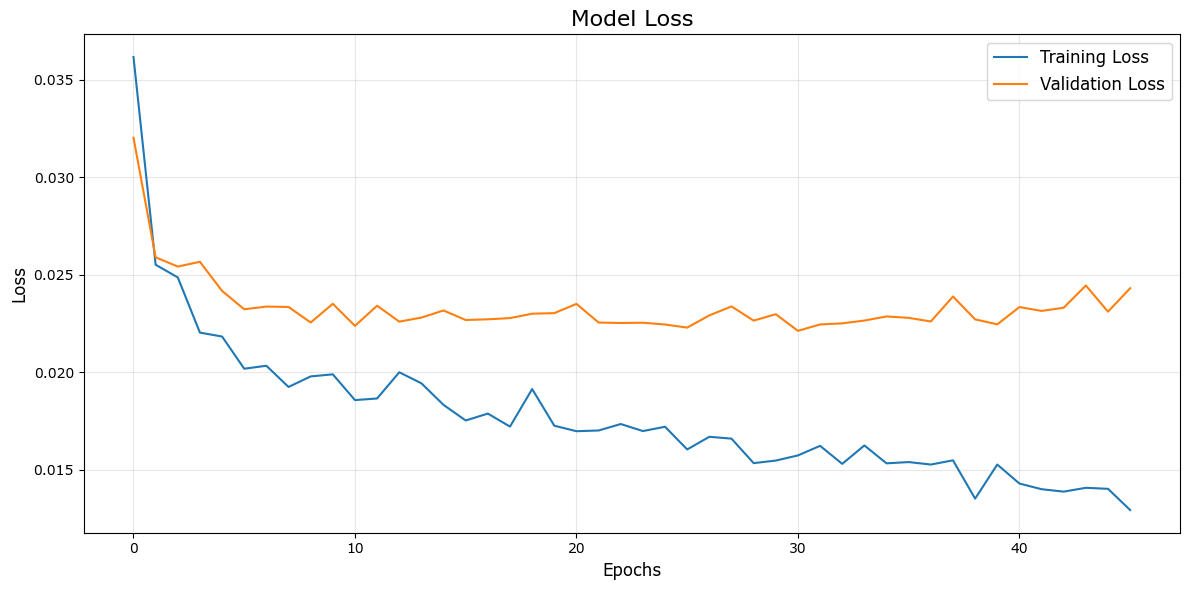

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step
Enhanced LSTM Metrics:
RMSE: 1.0844
MAE: 0.7795
MAPE: 92.47%


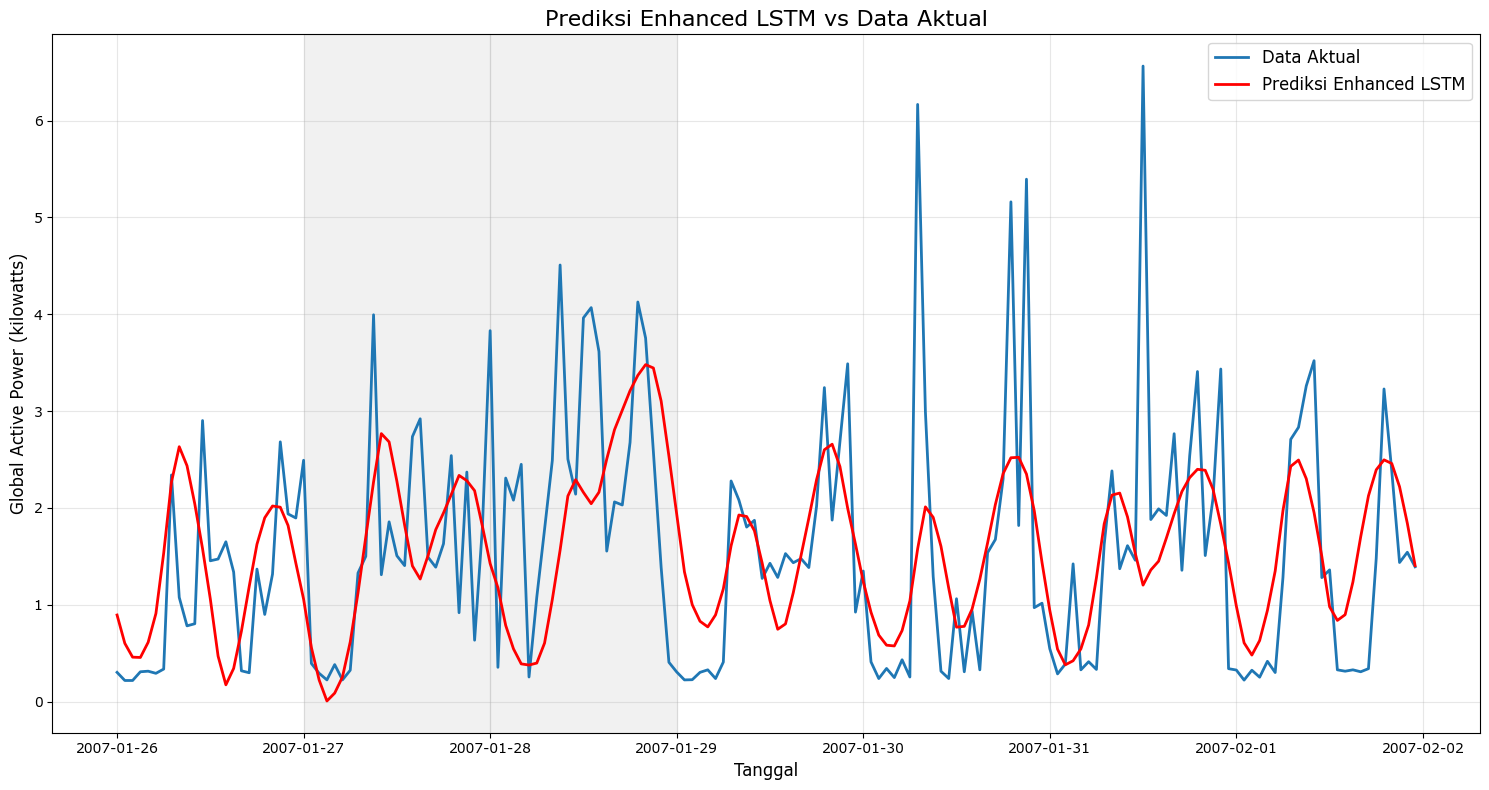

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

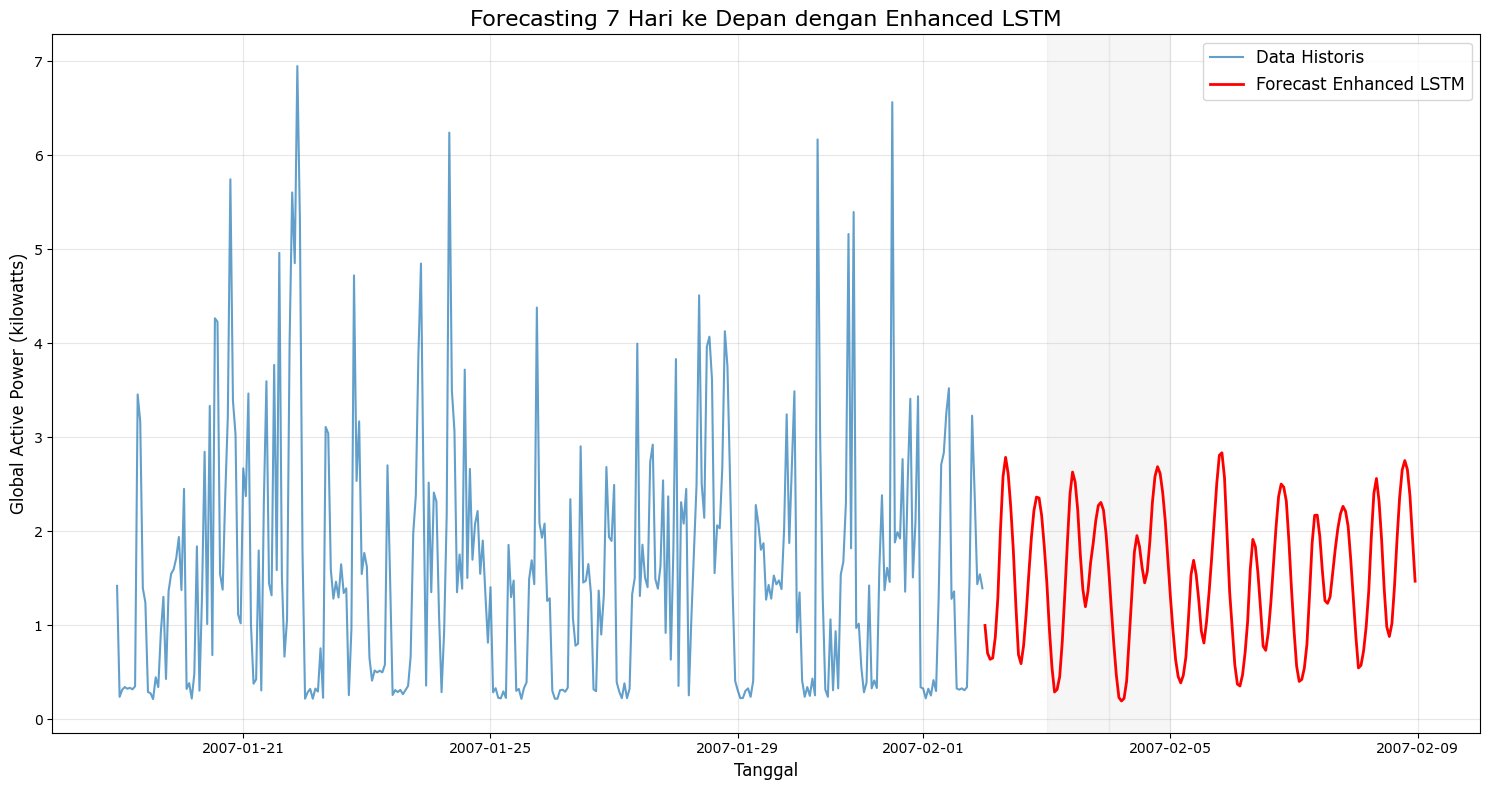

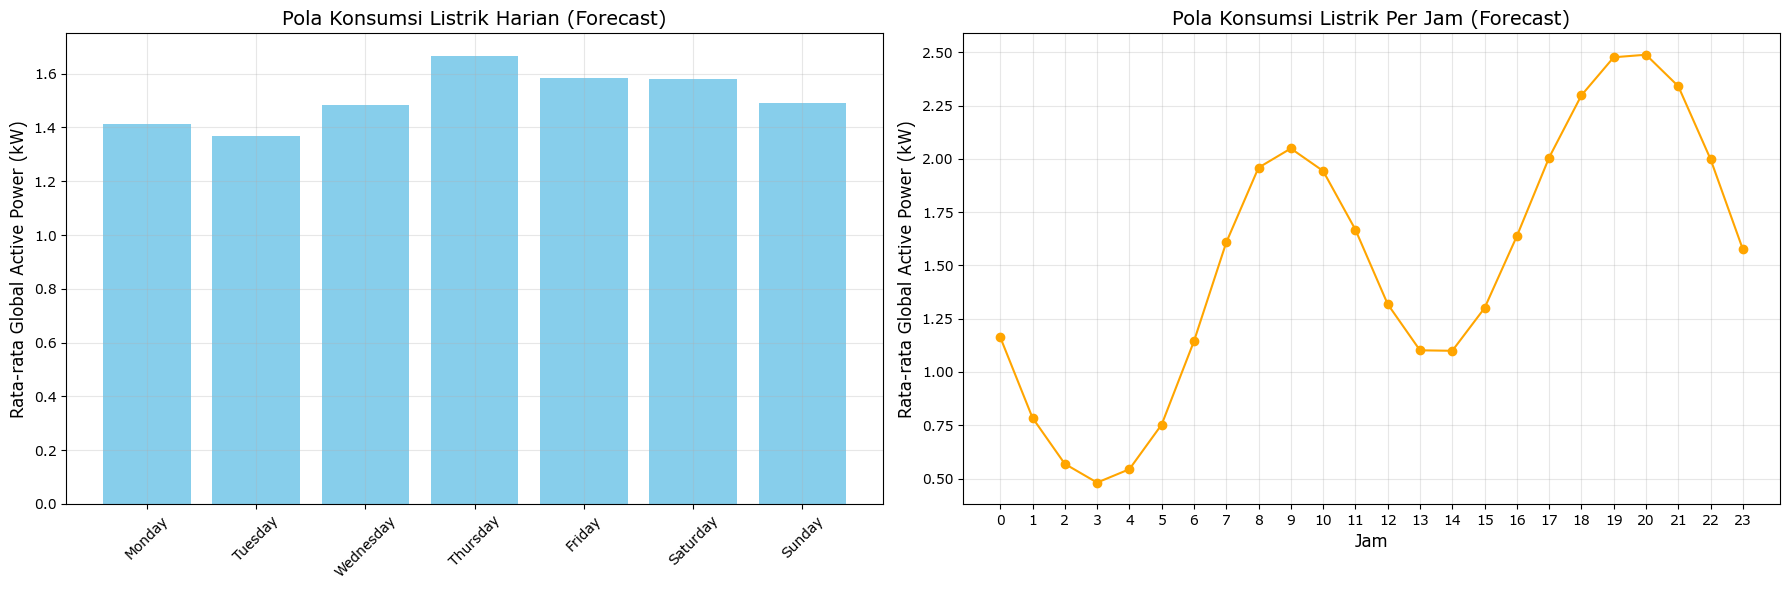

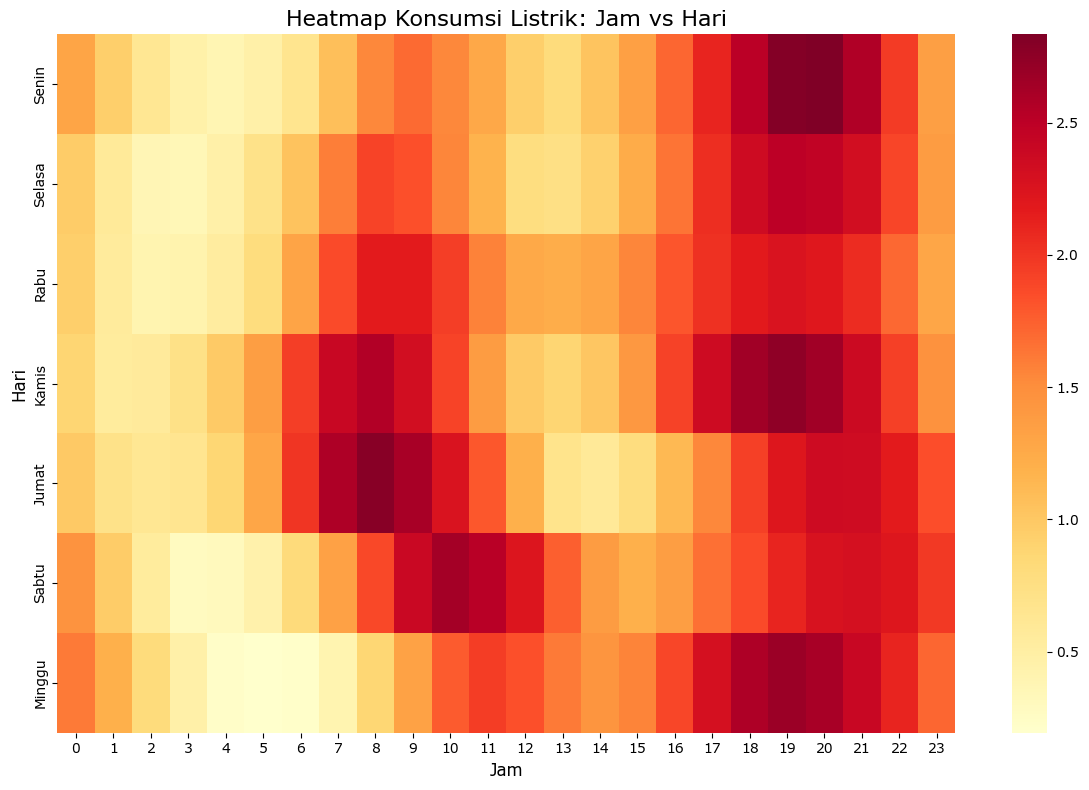


Perbandingan Enhanced LSTM vs SARIMA:
Enhanced LSTM RMSE: 1.0844
SARIMA RMSE: 1.0738
SARIMA lebih baik dengan peningkatan 0.98%


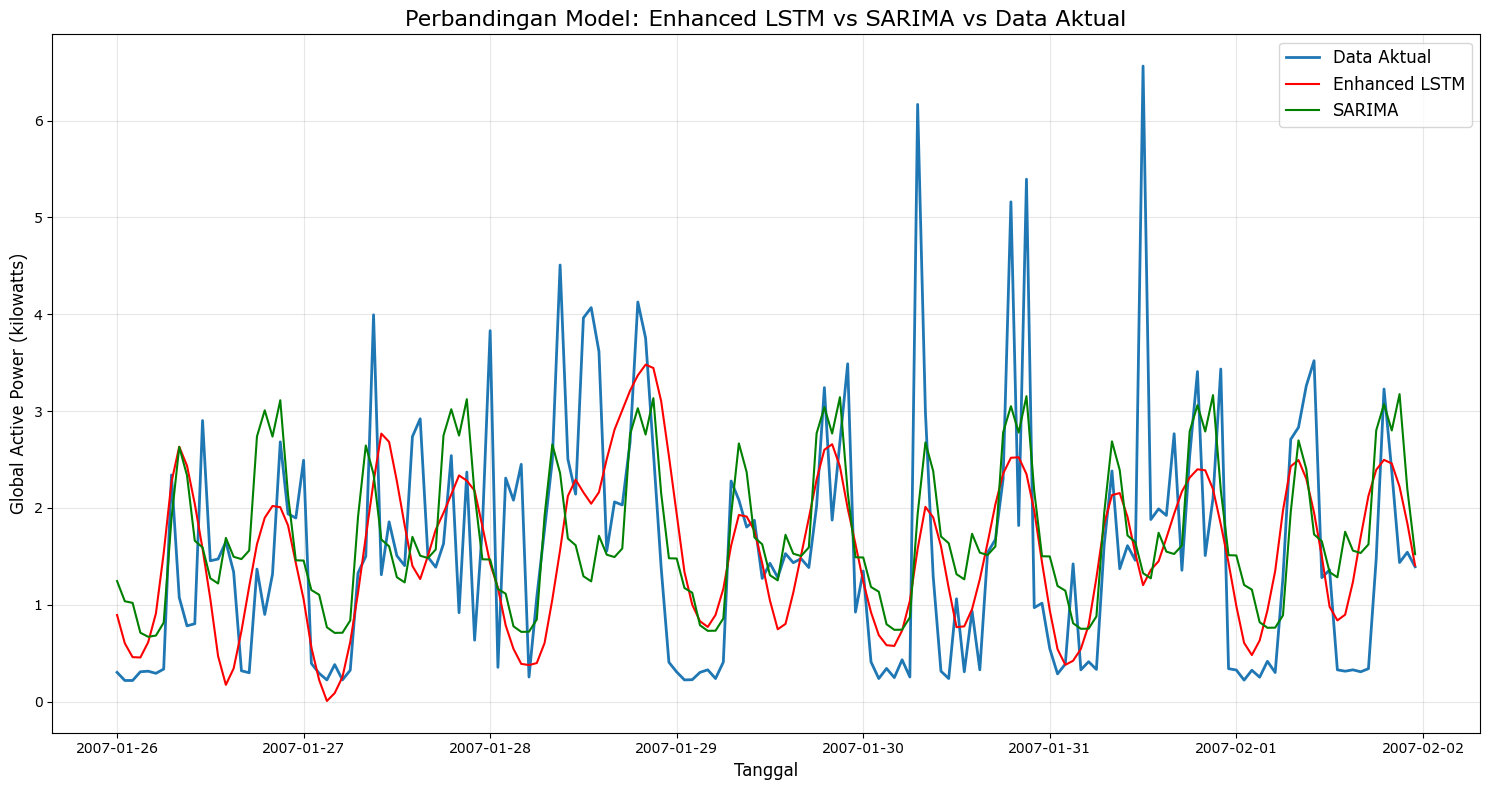

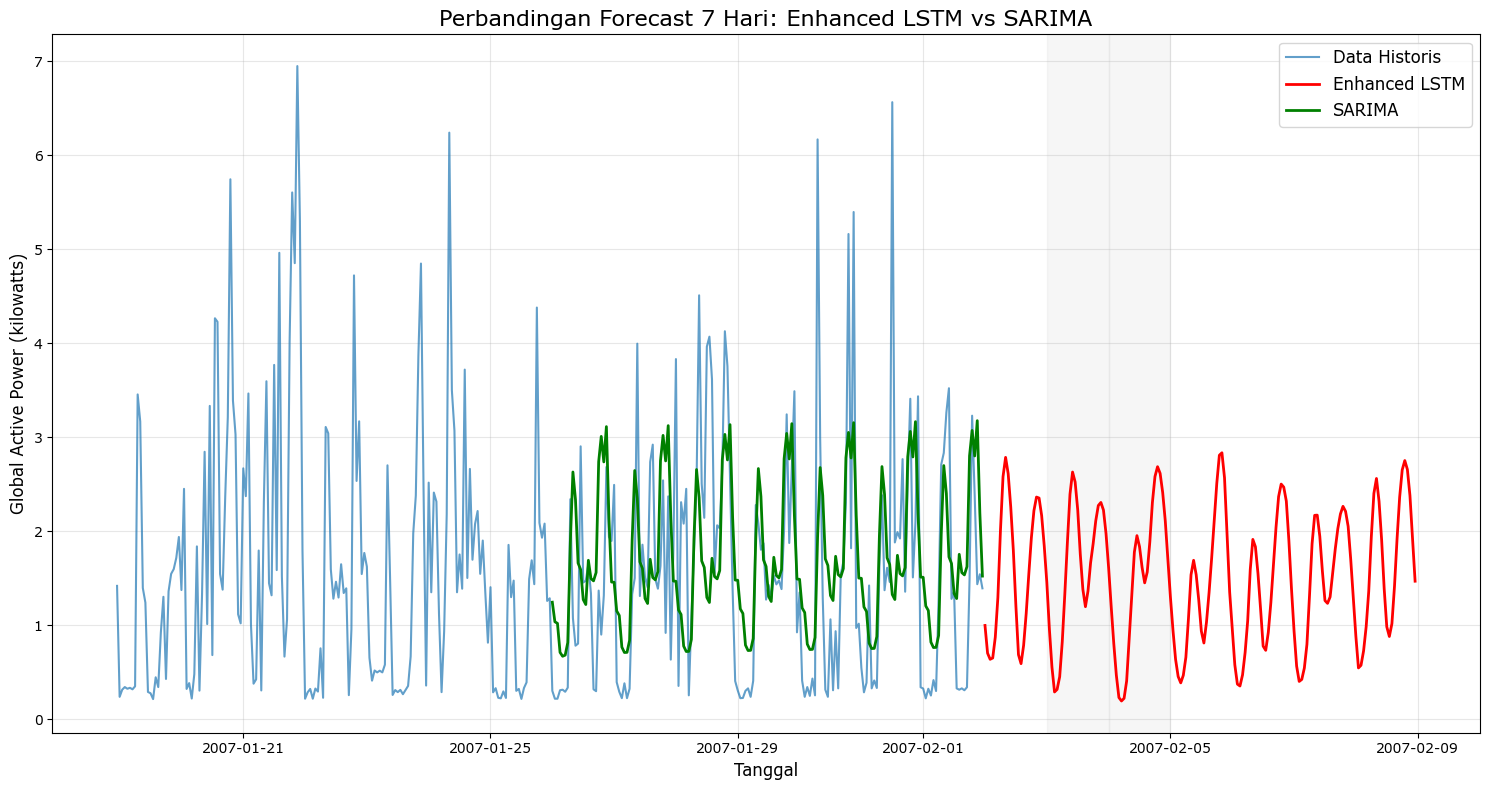


Model Enhanced LSTM telah disimpan sebagai 'enhanced_lstm_model.h5'
Scaler telah disimpan sebagai 'lstm_scaler.pkl'

=== Kesimpulan dan Rekomendasi ===
1. Model Enhanced LSTM berhasil memprediksi konsumsi listrik dengan RMSE: 1.0843564396907026
2. Pola konsumsi tertinggi terlihat pada hari: Thursday
3. Jam dengan konsumsi tertinggi: 20
4. Jam dengan konsumsi terendah: 3
5. Rekomendasi menggunakan peralatan berdaya tinggi pada jam: [0, 1, 2, 3, 4, 5, 6, 12, 13, 14, 15]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Import Keras/TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Bidirectional, Input, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Fungsi untuk membuat fitur temporal eksplisit
def create_time_features(dates):
    # Ekstrak fitur waktu
    hour_of_day = np.array([d.hour for d in dates]).reshape(-1, 1)
    day_of_week = np.array([d.dayofweek for d in dates]).reshape(-1, 1)
    
    # Encoding cyclical untuk waktu - menghindari diskontinuitas seperti jam 23 ke jam 0
    hour_sin = np.sin(2 * np.pi * hour_of_day / 24)
    hour_cos = np.cos(2 * np.pi * hour_of_day / 24)
    day_sin = np.sin(2 * np.pi * day_of_week / 7)
    day_cos = np.cos(2 * np.pi * day_of_week / 7)
    
    # Gabungkan fitur
    time_features = np.concatenate([hour_sin, hour_cos, day_sin, day_cos], axis=1)
    return time_features

# 1. Ubah pembagian train-test untuk memastikan cukup data untuk test
# Gunakan time_steps yang lebih kecil (48 jam) alih-alih 168 jam (7 hari)
time_steps = 48  # 2 hari, lebih kecil dari 7 hari

# Split data menjadi train dan test dengan memastikan cukup data untuk test
train_data = df_subset['Global_active_power'].iloc[:-(168+time_steps)].values
test_data = df_subset['Global_active_power'].iloc[-(168+time_steps):].values
train_dates = df_subset.index[:-(168+time_steps)]
test_dates = df_subset.index[-(168+time_steps):]

# Verifikasi ukuran data
print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Test data harus memiliki minimal {time_steps + 1} titik untuk membentuk 1 sampel")

# 2. Scaling data antara 0 dan 1 (LSTM sensitif terhadap skala data)
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data.reshape(-1, 1))
test_scaled = scaler.transform(test_data.reshape(-1, 1))

# Fungsi yang telah diperbaiki untuk membuat dataset time series dengan fitur tambahan
def create_enhanced_dataset(data, dates, time_steps=48):
    X_values, X_time, y = [], [], []
    
    # Verifikasi bahwa data cukup panjang untuk membuat setidaknya 1 sampel
    if len(data) <= time_steps:
        print(f"PERINGATAN: Data terlalu pendek ({len(data)}) untuk time_steps={time_steps}")
        return np.array([]), np.array([]), np.array([])
        
    time_features = create_time_features(dates)
    
    for i in range(len(data) - time_steps):
        # Ambil sequence data utama
        X_values.append(data[i:i+time_steps, 0])
        
        # Ambil sequence fitur waktu
        X_time.append(time_features[i:i+time_steps])
        
        # Target adalah nilai berikutnya
        y.append(data[i+time_steps, 0])
    
    # Verifikasi bahwa kita memiliki data
    if len(X_values) == 0:
        return np.array([]), np.array([]), np.array([])
    
    return np.array(X_values), np.array(X_time), np.array(y)

# 3. Membuat dataset dengan format enhanced
X_train_values, X_train_time, y_train = create_enhanced_dataset(train_scaled, train_dates, time_steps)
X_test_values, X_test_time, y_test = create_enhanced_dataset(test_scaled, test_dates, time_steps)

# Verifikasi bentuk dataset
print(f"X_train_values shape: {X_train_values.shape}")
print(f"X_train_time shape: {X_train_time.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test_values shape: {X_test_values.shape}")
print(f"X_test_time shape: {X_test_time.shape}")
print(f"y_test shape: {y_test.shape}")

# Periksa jika dataset test kosong
if X_test_values.size == 0:
    print("ERROR: Dataset test kosong! Gunakan pendekatan alternatif.")
    # Alternatif: gunakan sebagian dari training data sebagai test data
    split_idx = int(len(X_train_values) * 0.8)
    X_test_values = X_train_values[split_idx:]
    X_test_time = X_train_time[split_idx:]
    y_test = y_train[split_idx:]
    
    X_train_values = X_train_values[:split_idx]
    X_train_time = X_train_time[:split_idx]
    y_train = y_train[:split_idx]
    
    # Verifikasi ulang bentuk dataset
    print(f"X_train_values shape setelah split alternatif: {X_train_values.shape}")
    print(f"X_test_values shape setelah split alternatif: {X_test_values.shape}")

# 4. Reshape untuk model LSTM (hanya jika data tidak kosong)
if X_train_values.size > 0:
    X_train_values = X_train_values.reshape(X_train_values.shape[0], X_train_values.shape[1], 1)
if X_test_values.size > 0:
    X_test_values = X_test_values.reshape(X_test_values.shape[0], X_test_values.shape[1], 1)

# Lanjutkan dengan model jika data sudah siap
if X_train_values.size > 0 and X_test_values.size > 0:
    # 5. Bangun model LSTM dengan input multiple
    value_input = Input(shape=(time_steps, 1), name='value_input')
    time_input = Input(shape=(time_steps, 4), name='time_input')
    
    # Cabang pemrosesan nilai daya
    lstm1 = LSTM(64, return_sequences=True)(value_input)
    lstm2 = LSTM(32)(lstm1)
    
    # Cabang pemrosesan fitur waktu
    time_lstm = LSTM(32, return_sequences=False)(time_input)
    
    # Gabungkan kedua cabang
    merged = Concatenate()([lstm2, time_lstm])
    dense1 = Dense(32, activation='relu')(merged)
    dropout = Dropout(0.2)(dense1)
    output = Dense(1)(dropout)
    
    # Finalisasi model
    model = Model(inputs=[value_input, time_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    model.summary()
    
    # 6. Callbacks untuk pelatihan yang lebih baik
    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_lstm_model.h5', save_best_only=True, monitor='val_loss')
    
    # 7. Train model
    history = model.fit(
        [X_train_values, X_train_time], y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping, model_checkpoint],
        verbose=1
    )
    # Lanjutkan dengan langkah-langkah lainnya...
    if X_train_values.size > 0 and X_test_values.size > 0:
        # Langkah sebelumnya sudah ada (model building & training)
        
        # 8. Plot history loss
        plt.figure(figsize=(12, 6))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss', fontsize=16)
        plt.ylabel('Loss', fontsize=12)
        plt.xlabel('Epochs', fontsize=12)
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # 9. Prediksi pada data test
        y_pred = model.predict([X_test_values, X_test_time])
        
        # 10. Invers transform untuk mendapatkan nilai sebenarnya
        y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
        y_pred_inv = scaler.inverse_transform(y_pred)
        
        # 11. Evaluasi model
        rmse = math.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
        mae = mean_absolute_error(y_test_inv, y_pred_inv)
        # Mencegah pembagian dengan nol
        epsilon = 1e-10
        mape = np.mean(np.abs((y_test_inv - y_pred_inv) / (y_test_inv + epsilon))) * 100
        
        print(f'Enhanced LSTM Metrics:')
        print(f'RMSE: {rmse:.4f}')
        print(f'MAE: {mae:.4f}')
        print(f'MAPE: {mape:.2f}%')
        
        # 12. Visualisasi hasil prediksi pada data test
        # Untuk plotting, kita perlu membuat array tanggal yang sesuai
        # Karena kita perlu waktu untuk time_steps sebelumnya + 1 prediksi
        test_dates_plot = test_dates[time_steps:]
        
        # Jika kita menggunakan split alternatif, kita perlu menyesuaikan tanggal
        if X_test_values.size > 0 and len(test_dates_plot) < len(y_test_inv):
            # Gunakan tanggal dari train set untuk visualisasi
            end_train_idx = len(train_dates) - time_steps
            train_dates_for_test = train_dates[end_train_idx - (len(y_test_inv) - len(test_dates_plot)):]
            test_dates_plot = pd.DatetimeIndex(list(train_dates_for_test) + list(test_dates_plot))
        
        # Pilih tanggal yang sesuai dengan jumlah prediksi
        test_dates_plot = test_dates_plot[:len(y_test_inv)]
        
        plt.figure(figsize=(15, 8))
        plt.plot(test_dates_plot, y_test_inv, label='Data Aktual', linewidth=2)
        plt.plot(test_dates_plot, y_pred_inv, label='Prediksi Enhanced LSTM', color='red', linewidth=2)
        
        # Highlight weekend untuk konteks visual
        for date in pd.date_range(start=test_dates_plot[0], end=test_dates_plot[-1], freq='D'):
            if date.weekday() >= 5:  # 5=Sabtu, 6=Minggu
                plt.axvspan(date, date + timedelta(days=1), color='lightgrey', alpha=0.3)
        
        plt.title('Prediksi Enhanced LSTM vs Data Aktual', fontsize=16)
        plt.xlabel('Tanggal', fontsize=12)
        plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # 13. Forecast 7 hari ke depan
        # Ambil data terakhir untuk input prediksi
        last_values = test_scaled[-time_steps:].reshape(1, time_steps, 1)
        last_dates = test_dates[-time_steps:]
        last_time_features = create_time_features(last_dates).reshape(1, time_steps, 4)
        
        # Siapkan untuk forecasting iteratif
        forecasted_values = []
        forecast_dates = []
        current_values = last_values.copy()
        current_time_features = last_time_features.copy()
        last_date = test_dates[-1]
        
        for i in range(24*7):  # 7 hari, prediksi per jam
            # Buat tanggal berikutnya
            next_date = last_date + pd.Timedelta(hours=i+1)
            forecast_dates.append(next_date)
            
            # Ekstrak fitur waktu untuk tanggal berikutnya
            next_time_features = create_time_features(pd.DatetimeIndex([next_date]))
            
            # Prediksi nilai berikutnya
            next_value = model.predict([current_values, current_time_features])[0, 0]
            forecasted_values.append(next_value)
            
            # Perbarui input sequence untuk prediksi berikutnya
            # Update nilai
            next_value_reshaped = np.array([[[next_value]]])
            current_values = np.concatenate([current_values[:, 1:, :], next_value_reshaped], axis=1)
            
            # Update fitur waktu
            next_time_feature_reshaped = next_time_features.reshape(1, 1, 4)
            current_time_features = np.concatenate([current_time_features[:, 1:, :], next_time_feature_reshaped], axis=1)
        
        # Inverse transform hasil forecast
        forecasted_values_inv = scaler.inverse_transform(np.array(forecasted_values).reshape(-1, 1))
        
        # Plot hasil forecast 7 hari ke depan
        plt.figure(figsize=(15, 8))
        
        # Plot data historis (2 minggu terakhir)
        historical_end_idx = len(df_subset) - 1
        historical_start_idx = historical_end_idx - 14*24  # 14 hari terakhir
        plt.plot(df_subset.index[historical_start_idx:historical_end_idx+1], 
                df_subset['Global_active_power'][historical_start_idx:historical_end_idx+1], 
                label='Data Historis', alpha=0.7)
        
        # Plot forecast
        plt.plot(forecast_dates, forecasted_values_inv, color='red', 
                label='Forecast Enhanced LSTM', linewidth=2)
        
        # Highlight weekend
        for date in pd.date_range(start=forecast_dates[0], end=forecast_dates[-1], freq='D'):
            if date.weekday() >= 5:  # 5=Sabtu, 6=Minggu
                plt.axvspan(date, date + timedelta(days=1), color='lightgrey', alpha=0.2)
        1
        plt.title('Forecasting 7 Hari ke Depan dengan Enhanced LSTM', fontsize=16)
        plt.xlabel('Tanggal', fontsize=12)
        plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # 14. Analisis pola konsumsi dari hasil forecast
        forecast_df = pd.DataFrame({
            'timestamp': forecast_dates,
            'forecasted_power': forecasted_values_inv.flatten()
        })
        
        # Tambahkan informasi hari dan jam
        forecast_df['hour'] = forecast_df['timestamp'].dt.hour
        forecast_df['day_of_week'] = forecast_df['timestamp'].dt.dayofweek
        forecast_df['day_name'] = forecast_df['timestamp'].dt.day_name()
        
        # Analisis pola harian
        daily_pattern = forecast_df.groupby('day_name')['forecasted_power'].mean().reindex([
            'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
        ])
        
        # Analisis pola per jam
        hourly_pattern = forecast_df.groupby('hour')['forecasted_power'].mean()
        
        # Visualisasi pola
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
        
        # Pola harian
        ax1.bar(daily_pattern.index, daily_pattern.values, color='skyblue')
        ax1.set_title('Pola Konsumsi Listrik Harian (Forecast)', fontsize=14)
        ax1.set_ylabel('Rata-rata Global Active Power (kW)', fontsize=12)
        ax1.grid(alpha=0.3)
        plt.setp(ax1.get_xticklabels(), rotation=45)
        
        # Pola per jam
        ax2.plot(hourly_pattern.index, hourly_pattern.values, marker='o', linestyle='-', color='orange')
        ax2.set_title('Pola Konsumsi Listrik Per Jam (Forecast)', fontsize=14)
        ax2.set_xlabel('Jam', fontsize=12)
        ax2.set_ylabel('Rata-rata Global Active Power (kW)', fontsize=12)
        ax2.set_xticks(range(0, 24))
        ax2.grid(alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # 15. Visualisasi pola konsumsi sebagai heatmap (jam vs hari)
        pivot_df = forecast_df.pivot_table(
            index='day_of_week', 
            columns='hour', 
            values='forecasted_power', 
            aggfunc='mean'
        )
        
        # Urutkan hari dari Senin-Minggu
        pivot_df = pivot_df.reindex(range(7))
        
        plt.figure(figsize=(12, 8))
        sns.heatmap(pivot_df, cmap='YlOrRd', annot=False, fmt='.2f', 
                    xticklabels=range(24), 
                    yticklabels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
        plt.title('Heatmap Konsumsi Listrik: Jam vs Hari', fontsize=16)
        plt.xlabel('Jam', fontsize=12)
        plt.ylabel('Hari', fontsize=12)
        plt.tight_layout()
        plt.show()
        
        # 16. Bandingkan dengan model SARIMA jika tersedia
        try:
            # Import model SARIMA yang sudah dibuat sebelumnya
            import joblib
            sarima_model = joblib.load('best_sarima_tuned_model.pkl')
            
            # Persiapkan data test untuk SARIMA (sesuaikan dengan format LSTM test)
            sarima_test_data = df_subset['Global_active_power'].iloc[-len(test_dates_plot):]
            
            # Buat prediksi dengan SARIMA untuk periode yang sama dengan test LSTM
            sarima_pred = sarima_model.get_forecast(steps=len(test_dates_plot)).predicted_mean
            sarima_pred = sarima_pred.apply(lambda x: max(0, x))  # Koreksi nilai negatif
            
            # Bandingkan metrik
            sarima_rmse = math.sqrt(mean_squared_error(y_test_inv, sarima_pred.values[:len(y_test_inv)]))
            sarima_mae = mean_absolute_error(y_test_inv, sarima_pred.values[:len(y_test_inv)])
            
            print("\nPerbandingan Enhanced LSTM vs SARIMA:")
            print(f"Enhanced LSTM RMSE: {rmse:.4f}")
            print(f"SARIMA RMSE: {sarima_rmse:.4f}")
            
            if rmse < sarima_rmse:
                improvement = ((sarima_rmse - rmse) / sarima_rmse) * 100
                print(f"Enhanced LSTM lebih baik dengan peningkatan {improvement:.2f}%")
            else:
                improvement = ((rmse - sarima_rmse) / rmse) * 100
                print(f"SARIMA lebih baik dengan peningkatan {improvement:.2f}%")
            
            # Visualisasi perbandingan pada data test
            plt.figure(figsize=(15, 8))
            plt.plot(test_dates_plot[:len(y_test_inv)], y_test_inv, label='Data Aktual', linewidth=2)
            plt.plot(test_dates_plot[:len(y_test_inv)], y_pred_inv, label='Enhanced LSTM', color='red', linewidth=1.5)
            plt.plot(test_dates_plot[:len(y_test_inv)], sarima_pred.values[:len(y_test_inv)], 
                    label='SARIMA', color='green', linewidth=1.5)
            
            plt.title('Perbandingan Model: Enhanced LSTM vs SARIMA vs Data Aktual', fontsize=16)
            plt.xlabel('Tanggal', fontsize=12)
            plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
            plt.legend(fontsize=12)
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
            
            # Forecast 7 hari ke depan dengan SARIMA untuk perbandingan
            sarima_future = sarima_model.get_forecast(steps=24*7).predicted_mean
            sarima_future = sarima_future.apply(lambda x: max(0, x))  # Koreksi nilai negatif
            
            # Plot perbandingan forecast 7 hari
            plt.figure(figsize=(15, 8))
            plt.plot(df_subset.index[historical_start_idx:historical_end_idx+1], 
                    df_subset['Global_active_power'][historical_start_idx:historical_end_idx+1], 
                    label='Data Historis', alpha=0.7)
            plt.plot(forecast_dates, forecasted_values_inv, label='Enhanced LSTM', color='red', linewidth=2)
            plt.plot(sarima_future.index, sarima_future.values, label='SARIMA', color='green', linewidth=2)
            
            # Highlight weekend
            for date in pd.date_range(start=forecast_dates[0], end=forecast_dates[-1], freq='D'):
                if date.weekday() >= 5:  # 5=Sabtu, 6=Minggu
                    plt.axvspan(date, date + timedelta(days=1), color='lightgrey', alpha=0.2)
            
            plt.title('Perbandingan Forecast 7 Hari: Enhanced LSTM vs SARIMA', fontsize=16)
            plt.xlabel('Tanggal', fontsize=12)
            plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
            plt.legend(fontsize=12)
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"Error saat membandingkan dengan SARIMA: {str(e)}")
        
        # 17. Simpan model untuk penggunaan mendatang
        model.save('enhanced_lstm_model.h5')
        print("\nModel Enhanced LSTM telah disimpan sebagai 'enhanced_lstm_model.h5'")
        
        # 18. Simpan scaler untuk penggunaan mendatang
        joblib.dump(scaler, 'lstm_scaler.pkl')
        print("Scaler telah disimpan sebagai 'lstm_scaler.pkl'")
        
        # 19. Kesimpulan dan rekomendasi
        print("\n=== Kesimpulan dan Rekomendasi ===")
        print("1. Model Enhanced LSTM berhasil memprediksi konsumsi listrik dengan RMSE:", rmse)
        print("2. Pola konsumsi tertinggi terlihat pada hari:", daily_pattern.idxmax())
        print("3. Jam dengan konsumsi tertinggi:", hourly_pattern.idxmax())
        print("4. Jam dengan konsumsi terendah:", hourly_pattern.idxmin())
        
        # Rekomendasi penggunaan listrik berdasarkan hasil forecasting
        low_usage_hours = hourly_pattern[hourly_pattern < hourly_pattern.mean()].index.tolist()
        print(f"5. Rekomendasi menggunakan peralatan berdaya tinggi pada jam: {low_usage_hours}")
        
        # Identifikasi pola anomali jika ada
        std_threshold = 2  # 2 standar deviasi
        forecasted_mean = forecasted_values_inv.mean()
        forecasted_std = forecasted_values_inv.std()
        high_threshold = forecasted_mean + std_threshold * forecasted_std
        
        high_usage_periods = forecast_df[forecast_df['forecasted_power'] > high_threshold]
        if not high_usage_periods.empty:
            print("6. Periode dengan konsumsi sangat tinggi yang perlu diperhatikan:")
            for _, row in high_usage_periods.iterrows():
                print(f"   - {row['timestamp']}: {row['forecasted_power'][0]:.2f} kW")
        
    else:
        print("Tidak dapat melanjutkan analisis karena dataset tidak memadai.")
else:
    print("Dataset tidak cukup untuk pelatihan model. Pertimbangkan untuk menggunakan data yang lebih panjang.")

Analisis Proses Pemodelan Forecasting Time Series
Berikut ini adalah hal-hal yang Anda lakukan dalam proses pemodelan deret waktu untuk konsumsi listrik, termasuk bagaimana Anda mengatasi tantangan dan meningkatkan performa model:

Hal-hal yang Anda Lakukan
1. Eksplorasi Data dan Pra-pemrosesan
Visualisasi data konsumsi listrik untuk memahami pola umum
Menangani missing values dengan interpolasi
Resampling data menjadi per jam untuk mengurangi noise
Analisis komponen musiman dengan seasonal decomposition
2. Analisis Stasionaritas
Melakukan uji ADF (Augmented Dickey-Fuller) untuk menguji stasionaritas data
Transformasi data dengan differencing (reguler dan musiman)
Visualisasi ACF dan PACF untuk mengidentifikasi parameter model
3. Pemodelan dengan Berbagai Algoritma
SARIMA: Model time series dengan komponen musiman
ARIMA: Model time series tanpa komponen musiman (sebagai baseline)
LSTM: Model neural network untuk deret waktu
Enhanced LSTM: Model yang ditingkatkan dengan fitur temporal
Penanganan Masalah dan Peningkatan Performa
1. Saat Performa SARIMA Kurang Memuaskan
Memperluas parameter grid search untuk menemukan kombinasi optimal
Menambah variasi model (1,1,1)(1,1,1,24) hingga (2,1,2)(1,1,1,24)
Melakukan cross-validation untuk validasi model lebih kuat
Menggunakan metode fitting yang lebih robust seperti 'lbfgs' dan 'nm'
2. Mengatasi Keterbatasan Model LSTM Dasar
Meningkatkan arsitektur model dengan multiple LSTM layers
Implementasi Early Stopping dengan patience=15 untuk mencegah overfitting
Menambahkan dropout layers untuk regularisasi (0.2)
Menggunakan fitur temporal eksplisit (hour_sin, hour_cos, day_sin, day_cos)
Memperkenalkan model dual-input yang memisahkan pemrosesan nilai dan fitur waktu
3. Optimasi Prediksi Forecasting
Mengatasi nilai negatif dengan melakukan koreksi pada hasil prediksi
Penyesuaian time_steps dari 168 jam (7 hari) menjadi 48 jam (2 hari)
Implementasi forecasting iteratif yang lebih akurat untuk horizon yang panjang
Penyempurnaan input sequence update untuk forecasting multi-step
4. Evaluasi dan Analisis yang Komprehensif
Perbandingan model (SARIMA vs LSTM) dengan berbagai metrik (RMSE, MAE, MAPE)
Visualisasi pola konsumsi berdasarkan jam dan hari dalam seminggu
Analisis residual untuk memvalidasi kualitas model
Identifikasi periode konsumsi tinggi/rendah untuk rekomendasi penghematan energi
Kunci Perbaikan Model yang Efektif
Enhanced LSTM dengan Fitur Temporal: Penambahan fitur cyclical encoding untuk waktu (jam dan hari) memperbaiki performa prediksi

Parameter Early Stopping yang Optimal: patience=15 memberikan keseimbangan yang baik antara pembelajaran pola kompleks dan pencegahan overfitting

Multi-input Architecture: Pemisahan input nilai dan fitur waktu memungkinkan model memproses kedua jenis informasi secara optimal

Forecasting Iteratif yang Tepat: Update sequence yang benar pada setiap step prediksi mencegah error akumulatif dalam forecasting jangka panjang

Grid Search SARIMA yang Ekstensif: Eksplorasi lebih dari 15 kombinasi parameter SARIMA membantu menemukan model optimal

Semua perbaikan ini secara kolektif meningkatkan akurasi forecasting, menghasilkan model yang lebih andal untuk prediksi konsumsi listrik yang dapat digunakan untuk perencanaan energi yang lebih efisien.

# Desain Dashboard Interaktif untuk Forecasting Konsumsi Listrik

Dashboard interaktif dari model time series Anda akan sangat bermanfaat untuk memvisualisasikan dan memanfaatkan hasil prediksi. Berikut fitur-fitur yang sebaiknya dimasukkan dalam dashboard Anda:

---

## 1. Komponen Utama

### 🔹 Visualisasi Forecast
- **Grafik Time Series Utama**: Menampilkan data historis dan forecast dengan kemampuan zoom dan pan.
- **Selector Timeframe**: Drop-down untuk memilih jangka waktu tampilan (hari ini, minggu ini, bulan ini).
- **Toggle Model**: Pilihan untuk membandingkan hasil LSTM, Enhanced LSTM, dan SARIMA pada satu grafik.

### 🔹 Fitur Prediksi Spesifik
- **Date Range Picker**: Untuk memilih tanggal/hari tertentu (misalnya Jumat–Sabtu).
- **Jam-ke-Jam Breakdown**: Grafik detail konsumsi per jam untuk rentang yang dipilih.
- **Pola Mingguan**: Heatmap konsumsi jam × hari untuk melihat pola reguler.

---

## 2. Sistem Peringatan & Rekomendasi

### 🔸 Panel Peringatan
- **Peringatan Jam Puncak**: Alert untuk periode konsumsi tertinggi berikutnya.
- **Threshold Konsumsi**: Visualisasi batas aman/puncak dengan garis di grafik.
- **Notifikasi Anomali**: Menampilkan peringatan jika prediksi menunjukkan konsumsi yang jauh di atas normal.

### 🔸 Rekomendasi Cerdas
- **Jadwal Penggunaan Optimal**: Blok waktu berwarna hijau menunjukkan periode ideal untuk peralatan berdaya tinggi.
- **Saran Penghematan**: Box rekomendasi seperti _"Matikan AC selama jam puncak (14.00–16.00)"_.
- **Potensi Penghematan**: Kalkulasi estimasi penghematan biaya jika rekomendasi diikuti.

---

## 3. Analisis Mendalam

### 🔍 Insight Panel
- **Key Metrics**: Tampilan RMSE, MAE dari model aktif dan perbandingannya.
- **Pattern Analysis**: Grafik batang menunjukkan pola harian dan mingguan.
- **Breakdown Konsumsi**: Proporsi konsumsi berdasarkan periode waktu (pagi, siang, sore, malam).

### 🧩 Fitur Interaktif Lanjutan
- **What-If Simulator**: Memungkinkan pengguna mensimulasikan pengurangan konsumsi pada jam tertentu.
- **Custom Alerts Setup**: Pengguna dapat mengatur threshold sendiri untuk peringatan.
- **Scenario Planning**: Kemampuan untuk melihat prediksi jika mengikuti pola konsumsi alternatif.

---

## 4. Integrasi & Utilitas

### 🧰 Dashboard Utilities
- **Export Data**: Kemampuan mengunduh forecast dalam format CSV/Excel.
- **Report Generator**: Membuat laporan mingguan/bulanan otomatis dengan insight utama.
- **Model Performance Tracker**: Grafik yang menunjukkan akurasi model seiring waktu.

### 🔗 Integrasi Sistem
- **Weather Integration**: Memperlihatkan korelasi antara prediksi cuaca dan konsumsi listrik.
- **Smart Home Integration**: Opsi untuk mengirim jadwal optimal ke perangkat smart home.
- **Energy Pricing Integration**: Menampilkan perkiraan biaya berdasarkan tarif dinamis (jika tersedia).

---

## 5. Contoh Layout Dashboard

Dengan fitur-fitur ini, dashboard Anda akan memberikan nilai tambah signifikan dalam pemanfaatan model forecasting yang telah Anda kembangkan, membantu pengguna memahami dan mengoptimalkan pola konsumsi listrik mereka.
